In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
!pip install emot

#NLTK libraries
import nltk
import re
import string
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from emot.emo_unicode import EMOTICONS_EMO
from nltk.stem import WordNetLemmatizer
from collections import Counter
from imblearn.over_sampling import SMOTE

# Machine Learning libraries
import sklearn 
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import svm, datasets
from sklearn import preprocessing 

#Metrics libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

#Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Other miscellaneous libraries
from scipy import interp
from itertools import cycle
import cufflinks as cf
from collections import defaultdict
from collections import Counter
from imblearn.over_sampling import SMOTE

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 22 kB/s 


In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [ ]:
reviews = pd.read_json('/content/drive/Shareddrives/Thesis(Group-4008)/Final Defense(4.2)/Dataset/Experimental/Automotive_5.json', lines=True)
print('Amazon Reviews for sentiment Analysis Dataset:')
reviews

Amazon Reviews for sentiment Analysis Dataset:


reviewerID        asin                        reviewerName  \
0      A3F73SC1LY51OO  B00002243X                     Alan Montgomery   
1      A20S66SKYXULG2  B00002243X                            alphonse   
2      A2I8LFSN2IS5EO  B00002243X                               Chris   
3      A3GT2EWQSO45ZG  B00002243X                              DeusEx   
4      A3ESWJPAVRPWB4  B00002243X                        E. Hernandez   
...               ...         ...                                 ...   
20468  A1KB43BI085A48  B00KIAQ8VW                             Mike F.   
20469  A3HIUWKL4D853W  B00KIAQ8VW                                RayH   
20470  A1S95WASXJ02VX  B00KIAQ8VW                 Roberto Aguilar Jr.   
20471  A2IID0Z6EHF5KP  B00KIAQ8VW                              Soarer   
20472  A3HKZTFCPIK2OE  B00KIAQ8VW  SSG Barnes (ABN) "James C. Barnes"   

        helpful                                         reviewText  overall  \
0        [4, 4]  I needed a set of jumper cables for my new car...        5   
1        [1, 1]  These long cables work fine for my truck, but ...        4   
2        [0, 0]  Can't comment much on these since they have no...        5   
3      [19, 19]  I absolutley love Amazon!!!  For the price of ...        5   
4        [0, 0]  I purchased the 12' feet long cable set and th...        5   
...         ...                                                ...      ...   
20468    [1, 1]  I've bought 10 of these over the past year to ...        5   
20469    [0, 0]  OK, I have to admit, the price of this item di...        2   
20470    [0, 0]  I love my skull face mask. It makes me outstan...        5   
20471    [0, 0]  This mask of course as described is half-face ...        5   
20472    [0, 0]  Good light weight for just cool nights or rain...        5   

                                                 summary  unixReviewTime  \
0             Work Well - Should Have Bought Longer Ones      1313539200   
1                                       Okay long cables      1315094400   
2                             Looks and feels heavy Duty      1374710400   
3                  Excellent choice for Jumper Cables!!!      1292889600   
4                 Excellent, High Quality Starter Cables      1341360000   
...                                                  ...             ...   
20468                    Excellent quality for the price      1396915200   
20469  Light weight neck and face cover with whimsica...      1391472000   
20470            I love to ride with my Skull Face Mask.      1386547200   
20471                              Great neck protection      1357171200   
20472                                          FACE MASK      1395100800   

        reviewTime  
0      08 17, 2011  
1       09 4, 2011  
2      07 25, 2013  
3      12 21, 2010  
4       07 4, 2012  
...            ...  
20468   04 8, 2014  
20469   02 4, 2014  
20470   12 9, 2013  
20471   01 3, 2013  
20472  03 18, 2014  

[20473 rows x 9 columns]

In [ ]:
#reviews = pd.read_csv('/content/drive/Shareddrives/Thesis(Group-4008)/Final Defense(4.2)/Dataset/Experimental/Automotive_5.csv')
#print('Amazon Reviews for sentiment Analysis Dataset:')
#reviews

In [ ]:
## print shape of dataset with rows and columns and information 
print ("The shape of the  data is (row, column):"+ str(reviews.shape))
print ("The Information about the dataset:" + str(reviews.info()))

The shape of the  data is (row, column):(20473, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20473 entries, 0 to 20472
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewerID      20473 non-null  object
 1   asin            20473 non-null  object
 2   reviewerName    20260 non-null  object
 3   helpful         20473 non-null  object
 4   reviewText      20473 non-null  object
 5   overall         20473 non-null  int64 
 6   summary         20473 non-null  object
 7   unixReviewTime  20473 non-null  int64 
 8   reviewTime      20473 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.4+ MB
The Information about the dataset:None


In [ ]:
reviews.head()

reviewerID        asin     reviewerName   helpful  \
0  A3F73SC1LY51OO  B00002243X  Alan Montgomery    [4, 4]   
1  A20S66SKYXULG2  B00002243X         alphonse    [1, 1]   
2  A2I8LFSN2IS5EO  B00002243X            Chris    [0, 0]   
3  A3GT2EWQSO45ZG  B00002243X           DeusEx  [19, 19]   
4  A3ESWJPAVRPWB4  B00002243X     E. Hernandez    [0, 0]   

                                          reviewText  overall  \
0  I needed a set of jumper cables for my new car...        5   
1  These long cables work fine for my truck, but ...        4   
2  Can't comment much on these since they have no...        5   
3  I absolutley love Amazon!!!  For the price of ...        5   
4  I purchased the 12' feet long cable set and th...        5   

                                      summary  unixReviewTime   reviewTime  
0  Work Well - Should Have Bought Longer Ones      1313539200  08 17, 2011  
1                            Okay long cables      1315094400   09 4, 2011  
2                  Looks and feels heavy Duty      1374710400  07 25, 2013  
3       Excellent choice for Jumper Cables!!!      1292889600  12 21, 2010  
4      Excellent, High Quality Starter Cables      1341360000   07 4, 2012

In [ ]:
reviews.tail()

reviewerID        asin                        reviewerName helpful  \
20468  A1KB43BI085A48  B00KIAQ8VW                             Mike F.  [1, 1]   
20469  A3HIUWKL4D853W  B00KIAQ8VW                                RayH  [0, 0]   
20470  A1S95WASXJ02VX  B00KIAQ8VW                 Roberto Aguilar Jr.  [0, 0]   
20471  A2IID0Z6EHF5KP  B00KIAQ8VW                              Soarer  [0, 0]   
20472  A3HKZTFCPIK2OE  B00KIAQ8VW  SSG Barnes (ABN) "James C. Barnes"  [0, 0]   

                                              reviewText  overall  \
20468  I've bought 10 of these over the past year to ...        5   
20469  OK, I have to admit, the price of this item di...        2   
20470  I love my skull face mask. It makes me outstan...        5   
20471  This mask of course as described is half-face ...        5   
20472  Good light weight for just cool nights or rain...        5   

                                                 summary  unixReviewTime  \
20468                    Excellent quality for the price      1396915200   
20469  Light weight neck and face cover with whimsica...      1391472000   
20470            I love to ride with my Skull Face Mask.      1386547200   
20471                              Great neck protection      1357171200   
20472                                          FACE MASK      1395100800   

        reviewTime  
20468   04 8, 2014  
20469   02 4, 2014  
20470   12 9, 2013  
20471   01 3, 2013  
20472  03 18, 2014

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
#Checking for null values
print('The null values in the dataset:')
reviews.isnull().sum()

The null values in the dataset:


reviewerID          0
asin                0
reviewerName      213
helpful             0
reviewText          0
overall             0
summary             0
unixReviewTime      0
reviewTime          0
dtype: int64

In [ ]:
reviews['reviewText'] = reviews['reviewText'].fillna('Missing')

In [ ]:
#reviews = reviews.dropna()
reviews.isnull().sum()

reviewerID          0
asin                0
reviewerName      213
helpful             0
reviewText          0
overall             0
summary             0
unixReviewTime      0
reviewTime          0
dtype: int64

In [ ]:
print('The distribution of categories of sentiment:') 
reviews['overall'].value_counts()

The distribution of categories of sentiment:


5    13928
4     3967
3     1430
2      606
1      542
Name: overall, dtype: int64

In [ ]:
reviews['reviews'] = reviews['reviewText'] + reviews['summary']
reviews = reviews.drop(['reviewText', 'summary'], axis=1)
reviews.head()

reviewerID        asin     reviewerName   helpful  overall  \
0  A3F73SC1LY51OO  B00002243X  Alan Montgomery    [4, 4]        5   
1  A20S66SKYXULG2  B00002243X         alphonse    [1, 1]        4   
2  A2I8LFSN2IS5EO  B00002243X            Chris    [0, 0]        5   
3  A3GT2EWQSO45ZG  B00002243X           DeusEx  [19, 19]        5   
4  A3ESWJPAVRPWB4  B00002243X     E. Hernandez    [0, 0]        5   

   unixReviewTime   reviewTime  \
0      1313539200  08 17, 2011   
1      1315094400   09 4, 2011   
2      1374710400  07 25, 2013   
3      1292889600  12 21, 2010   
4      1341360000   07 4, 2012   

                                             reviews  
0  I needed a set of jumper cables for my new car...  
1  These long cables work fine for my truck, but ...  
2  Can't comment much on these since they have no...  
3  I absolutley love Amazon!!!  For the price of ...  
4  I purchased the 12' feet long cable set and th...

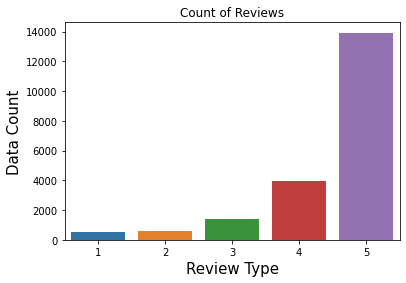

In [ ]:
ax = sns.countplot(x='overall', data=reviews)
#Setting labels and font size
ax.set(xlabel='Review Type', ylabel='Data Count',title='Count of Reviews')
ax.xaxis.get_label().set_fontsize(15)
ax.yaxis.get_label().set_fontsize(15)
plt.show()

In [ ]:
def sent(rating):
    if rating['overall'] == 3:
        value = 'Neutral'
    elif rating['overall'] > 3:
        value = 'Positive'
    else:
        value = 'Negative'
    return value

In [ ]:
#Applying the function in our new column
reviews['Sentiment'] = reviews.apply(sent, axis=1)
reviews.head()

reviewerID        asin     reviewerName   helpful  overall  \
0  A3F73SC1LY51OO  B00002243X  Alan Montgomery    [4, 4]        5   
1  A20S66SKYXULG2  B00002243X         alphonse    [1, 1]        4   
2  A2I8LFSN2IS5EO  B00002243X            Chris    [0, 0]        5   
3  A3GT2EWQSO45ZG  B00002243X           DeusEx  [19, 19]        5   
4  A3ESWJPAVRPWB4  B00002243X     E. Hernandez    [0, 0]        5   

   unixReviewTime   reviewTime  \
0      1313539200  08 17, 2011   
1      1315094400   09 4, 2011   
2      1374710400  07 25, 2013   
3      1292889600  12 21, 2010   
4      1341360000   07 4, 2012   

                                             reviews Sentiment  
0  I needed a set of jumper cables for my new car...  Positive  
1  These long cables work fine for my truck, but ...  Positive  
2  Can't comment much on these since they have no...  Positive  
3  I absolutley love Amazon!!!  For the price of ...  Positive  
4  I purchased the 12' feet long cable set and th...  Positive

In [ ]:
print('The count of sentiments:')
reviews['Sentiment'].value_counts()

The count of sentiments:


Positive    17895
Neutral      1430
Negative     1148
Name: Sentiment, dtype: int64

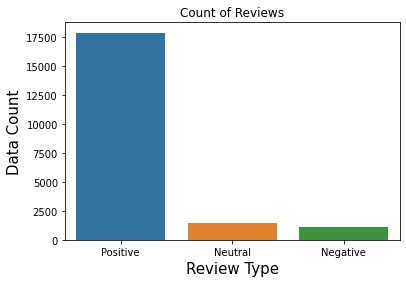

In [ ]:
ax = sns.countplot(x='Sentiment', data=reviews)
#Setting labels and font size
ax.set(xlabel='Review Type', ylabel='Data Count',title='Count of Reviews')
ax.xaxis.get_label().set_fontsize(15)
ax.yaxis.get_label().set_fontsize(15)
plt.show()

In [ ]:
# Splitting the date 
re_new = reviews["reviewTime"].str.split(",", n = 1, expand = True) 
  
# adding month to the main dataset 
reviews["date"] = re_new[0] 
  
# adding day to the main dataset 
reviews["year"] = re_new[1] 

re_new1 = reviews["date"].str.split(" ", n = 1, expand = True) 

# adding month to the main dataset 
reviews["month"] = re_new1[0] 

# adding day to the main dataset 
reviews["day"] = re_new1[1]

reviews = reviews.drop(['reviewTime', 'date'], axis=1)
reviews.head() 

reviewerID        asin     reviewerName   helpful  overall  \
0  A3F73SC1LY51OO  B00002243X  Alan Montgomery    [4, 4]        5   
1  A20S66SKYXULG2  B00002243X         alphonse    [1, 1]        4   
2  A2I8LFSN2IS5EO  B00002243X            Chris    [0, 0]        5   
3  A3GT2EWQSO45ZG  B00002243X           DeusEx  [19, 19]        5   
4  A3ESWJPAVRPWB4  B00002243X     E. Hernandez    [0, 0]        5   

   unixReviewTime                                            reviews  \
0      1313539200  I needed a set of jumper cables for my new car...   
1      1315094400  These long cables work fine for my truck, but ...   
2      1374710400  Can't comment much on these since they have no...   
3      1292889600  I absolutley love Amazon!!!  For the price of ...   
4      1341360000  I purchased the 12' feet long cable set and th...   

  Sentiment   year month day  
0  Positive   2011    08  17  
1  Positive   2011    09   4  
2  Positive   2013    07  25  
3  Positive   2010    12  21  
4  Positive   2012    07   4

In [ ]:
print('The year - wise count of reviews:')
reviews['year'].value_counts()

The year - wise count of reviews:


 2013    9022
 2014    5760
 2012    3148
 2011    1397
 2010     662
 2009     307
 2008     118
 2007      45
 2006      11
 2005       3
Name: year, dtype: int64

In [ ]:
print('Year - wise count of sentiments:')
reviews.groupby(['year','Sentiment']).size()

Year - wise count of sentiments:


year   Sentiment
 2005  Positive        3
 2006  Negative        1
       Neutral         1
       Positive        9
 2007  Negative        2
       Neutral         1
       Positive       42
 2008  Negative        8
       Neutral         8
       Positive      102
 2009  Negative       18
       Neutral        27
       Positive      262
 2010  Negative       52
       Neutral        44
       Positive      566
 2011  Negative       82
       Neutral        92
       Positive     1223
 2012  Negative      208
       Neutral       238
       Positive     2702
 2013  Negative      475
       Neutral       637
       Positive     7910
 2014  Negative      302
       Neutral       382
       Positive     5076
dtype: int64

In [ ]:
newreview = reviews["helpful"].astype(str).str.split(",", n = 1, expand = True)
newreview1 = newreview[0].astype(str).str.split("[", n = 1, expand = True)
newreview2 = newreview[1].astype(str).str.split("]", n = 1, expand = True)

#Resetting the index
newreview1.reset_index(drop=True, inplace=True)
newreview2.reset_index(drop=True, inplace=True)

#Dropping empty columns due to splitting 
newreview1 = newreview1.drop([0], axis=1)
newreview2 = newreview2.drop([1], axis=1)

#Concatenating the splitted columns
helpfulreview = pd.concat([newreview1, newreview2], axis=1)
reviews.head()

reviewerID        asin     reviewerName   helpful  overall  \
0  A3F73SC1LY51OO  B00002243X  Alan Montgomery    [4, 4]        5   
1  A20S66SKYXULG2  B00002243X         alphonse    [1, 1]        4   
2  A2I8LFSN2IS5EO  B00002243X            Chris    [0, 0]        5   
3  A3GT2EWQSO45ZG  B00002243X           DeusEx  [19, 19]        5   
4  A3ESWJPAVRPWB4  B00002243X     E. Hernandez    [0, 0]        5   

   unixReviewTime                                            reviews  \
0      1313539200  I needed a set of jumper cables for my new car...   
1      1315094400  These long cables work fine for my truck, but ...   
2      1374710400  Can't comment much on these since they have no...   
3      1292889600  I absolutley love Amazon!!!  For the price of ...   
4      1341360000  I purchased the 12' feet long cable set and th...   

  Sentiment   year month day  
0  Positive   2011    08  17  
1  Positive   2011    09   4  
2  Positive   2013    07  25  
3  Positive   2010    12  21  
4  Positive   2012    07   4

In [ ]:
#Converting into integer types
helpfulreview[0] = helpfulreview[0].astype(str).astype(int)
helpfulreview[1] = helpfulreview[1].astype(str).astype(int)

#Dividing the two columns, we have 0 in the second columns when dvided gives error, so I'm ignoring those errors
try:
  helpfulreview['result'] = helpfulreview[1]/helpfulreview[0]
except ZeroDivisionError:
  helpfulreview['result']=0

#Filling the NaN values(created due to dividing) with 0
helpfulreview['result'] = helpfulreview['result'].fillna(0)

#Rounding of the results to two decimal places
helpfulreview['result'] = helpfulreview['result'].round(2) 

#Attaching the results to a new column of the main dataframe
reviews['helpful_review'] = helpfulreview['result']

#dropping the helpful column from main dataframe
reviews = reviews.drop(['helpful'], axis=1)
reviews.head()

reviewerID        asin     reviewerName  overall  unixReviewTime  \
0  A3F73SC1LY51OO  B00002243X  Alan Montgomery        5      1313539200   
1  A20S66SKYXULG2  B00002243X         alphonse        4      1315094400   
2  A2I8LFSN2IS5EO  B00002243X            Chris        5      1374710400   
3  A3GT2EWQSO45ZG  B00002243X           DeusEx        5      1292889600   
4  A3ESWJPAVRPWB4  B00002243X     E. Hernandez        5      1341360000   

                                             reviews Sentiment   year month  \
0  I needed a set of jumper cables for my new car...  Positive   2011    08   
1  These long cables work fine for my truck, but ...  Positive   2011    09   
2  Can't comment much on these since they have no...  Positive   2013    07   
3  I absolutley love Amazon!!!  For the price of ...  Positive   2010    12   
4  I purchased the 12' feet long cable set and th...  Positive   2012    07   

  day  helpful_review  
0  17             1.0  
1   4             1.0  
2  25             0.0  
3  21             1.0  
4   4             0.0

In [ ]:
reviews['helpful_review'].replace([np.inf, -np.inf], 0,  inplace=True)
reviews.head()

reviewerID        asin     reviewerName  overall  unixReviewTime  \
0  A3F73SC1LY51OO  B00002243X  Alan Montgomery        5      1313539200   
1  A20S66SKYXULG2  B00002243X         alphonse        4      1315094400   
2  A2I8LFSN2IS5EO  B00002243X            Chris        5      1374710400   
3  A3GT2EWQSO45ZG  B00002243X           DeusEx        5      1292889600   
4  A3ESWJPAVRPWB4  B00002243X     E. Hernandez        5      1341360000   

                                             reviews Sentiment   year month  \
0  I needed a set of jumper cables for my new car...  Positive   2011    08   
1  These long cables work fine for my truck, but ...  Positive   2011    09   
2  Can't comment much on these since they have no...  Positive   2013    07   
3  I absolutley love Amazon!!!  For the price of ...  Positive   2010    12   
4  I purchased the 12' feet long cable set and th...  Positive   2012    07   

  day  helpful_review  
0  17             1.0  
1   4             1.0  
2  25             0.0  
3  21             1.0  
4   4             0.0

In [ ]:
reviews['helpful_review'].value_counts()

0.00    13903
1.00     4102
0.50      720
0.67      301
0.75      218
        ...  
0.15        1
0.59        1
0.63        1
0.54        1
0.07        1
Name: helpful_review, Length: 82, dtype: int64

In [ ]:
#Removing unnecessary columns
reviews = reviews.drop(['reviewerName'], axis=1)

In [ ]:
#function for converting emoticons into text
def convert_emoticons(text):
    for emot in EMOTICONS_EMO:
          text = text.replace(emot, EMOTICONS_EMO[emot].replace(" "," "))
    return text

#storing text with converted emoticons
reviews['reviews'] = reviews['reviews'].apply(lambda x:convert_emoticons(x))
reviews.head()

reviewerID        asin  overall  unixReviewTime  \
0  A3F73SC1LY51OO  B00002243X        5      1313539200   
1  A20S66SKYXULG2  B00002243X        4      1315094400   
2  A2I8LFSN2IS5EO  B00002243X        5      1374710400   
3  A3GT2EWQSO45ZG  B00002243X        5      1292889600   
4  A3ESWJPAVRPWB4  B00002243X        5      1341360000   

                                             reviews Sentiment   year month  \
0  I needed a set of jumper cables for my new car...  Positive   2011    08   
1  These long cables work fine for my truck, but ...  Positive   2011    09   
2  Can't comment much on these since they have no...  Positive   2013    07   
3  I absolutley love Amazon!!!  For the price of ...  Positive   2010    12   
4  I purchased the 12' feet long cable set and th...  Positive   2012    07   

  day  helpful_review  
0  17             1.0  
1   4             1.0  
2  25             0.0  
3  21             1.0  
4   4             0.0

In [ ]:
def clean_review(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

reviews['reviews'] = reviews['reviews'].apply(lambda x: clean_review(x))
reviews.head()

reviewerID        asin  overall  unixReviewTime  \
0  A3F73SC1LY51OO  B00002243X        5      1313539200   
1  A20S66SKYXULG2  B00002243X        4      1315094400   
2  A2I8LFSN2IS5EO  B00002243X        5      1374710400   
3  A3GT2EWQSO45ZG  B00002243X        5      1292889600   
4  A3ESWJPAVRPWB4  B00002243X        5      1341360000   

                                             reviews Sentiment   year month  \
0  i needed a set of jumper cables for my new car...  Positive   2011    08   
1  these long cables work fine for my truck but t...  Positive   2011    09   
2  cant comment much on these since they have not...  Positive   2013    07   
3  i absolutley love amazon  for the price of a s...  Positive   2010    12   
4  i purchased the  feet long cable set and they ...  Positive   2012    07   

  day  helpful_review  
0  17             1.0  
1   4             1.0  
2  25             0.0  
3  21             1.0  
4   4             0.0

In [ ]:
stop_words= ['themselves', 'them', 'itself', "its", 'himself', 'him', 'herself', 'yourselves', 'yourself', 'yours', "youre", 'your', "youd", "youve", "youll", 'you', 
             'ourselves', 'ours', 'our', 'myself', 'my', "shouldve", 'should', 'having', 'doing', 'does', 'do', 'being',  'into', 'with', 'it', 'such', 'just', 
             'above', 'over', 'very', 'have', 've', 'further', 'between', 'were', 'we', 'against', 'through', 'before', 'more', 'for', 'or', 'during', 'now', 
             'because', 'while', 'under', 'again', 'until', 'after', 'which', 'than', 'can', 'any', 'and', 'an', 'other', 'these', 'they', 'when', "shes", 'she', 
             'theirs', 'their', 'hers', 'where', 'then', 'there', 'here', 'the', 'her', 'he', 'this', 'his', 'is', 'some', 'so', 'same', 'am',  'me', 'what', 
             "thatll", 'that', 'at', 'once', 'only', 'on', 'below', 'been', 'be', 'in', 'both', 'are', 're', 'up', 'whom', 'who', 'each', 'too', 'to', 'by', 
             'from', 'how', 'about', 'out', 'own', 'why', 'most', 'few', 'did', 'of', 'had', 'those', 'all', 'has', 'was', 'as', 'y', 'd', 'a', 'i']

In [ ]:
reviews['reviews'] = reviews['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
reviews.head()

reviewerID        asin  overall  unixReviewTime  \
0  A3F73SC1LY51OO  B00002243X        5      1313539200   
1  A20S66SKYXULG2  B00002243X        4      1315094400   
2  A2I8LFSN2IS5EO  B00002243X        5      1374710400   
3  A3GT2EWQSO45ZG  B00002243X        5      1292889600   
4  A3ESWJPAVRPWB4  B00002243X        5      1341360000   

                                             reviews Sentiment   year month  \
0  needed set jumper cables new car good reviews ...  Positive   2011    08   
1  long cables work fine truck but quality seems ...  Positive   2011    09   
2  cant comment much since not yet used will come...  Positive   2013    07   
3  absolutley love amazon price set cheap booster...  Positive   2010    12   
4  purchased feet long cable set arrived retail c...  Positive   2012    07   

  day  helpful_review  
0  17             1.0  
1   4             1.0  
2  25             0.0  
3  21             1.0  
4   4             0.0

In [ ]:
#function for tokenization
def tokenization(text):
    tokenized = re.split('\W+',text)
    return tokenized

#storing tokenied text
reviews['tokenized_text'] = reviews['reviews'].apply(lambda x: tokenization(x))
reviews.head()

reviewerID        asin  overall  unixReviewTime  \
0  A3F73SC1LY51OO  B00002243X        5      1313539200   
1  A20S66SKYXULG2  B00002243X        4      1315094400   
2  A2I8LFSN2IS5EO  B00002243X        5      1374710400   
3  A3GT2EWQSO45ZG  B00002243X        5      1292889600   
4  A3ESWJPAVRPWB4  B00002243X        5      1341360000   

                                             reviews Sentiment   year month  \
0  needed set jumper cables new car good reviews ...  Positive   2011    08   
1  long cables work fine truck but quality seems ...  Positive   2011    09   
2  cant comment much since not yet used will come...  Positive   2013    07   
3  absolutley love amazon price set cheap booster...  Positive   2010    12   
4  purchased feet long cable set arrived retail c...  Positive   2012    07   

  day  helpful_review                                     tokenized_text  
0  17             1.0  [needed, set, jumper, cables, new, car, good, ...  
1   4             1.0  [long, cables, work, fine, truck, but, quality...  
2  25             0.0  [cant, comment, much, since, not, yet, used, w...  
3  21             1.0  [absolutley, love, amazon, price, set, cheap, ...  
4   4             0.0  [purchased, feet, long, cable, set, arrived, r...

In [ ]:
#library for lemmatization
from nltk.stem import WordNetLemmatizer 

#object for lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

#function for lemmatization
def lemmatizer(text):
    lemmatized = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemmatized

reviews['lemmatized_text'] = reviews['tokenized_text'].apply(lambda x:lemmatizer(x))
reviews.head() 

reviewerID        asin  overall  unixReviewTime  \
0  A3F73SC1LY51OO  B00002243X        5      1313539200   
1  A20S66SKYXULG2  B00002243X        4      1315094400   
2  A2I8LFSN2IS5EO  B00002243X        5      1374710400   
3  A3GT2EWQSO45ZG  B00002243X        5      1292889600   
4  A3ESWJPAVRPWB4  B00002243X        5      1341360000   

                                             reviews Sentiment   year month  \
0  needed set jumper cables new car good reviews ...  Positive   2011    08   
1  long cables work fine truck but quality seems ...  Positive   2011    09   
2  cant comment much since not yet used will come...  Positive   2013    07   
3  absolutley love amazon price set cheap booster...  Positive   2010    12   
4  purchased feet long cable set arrived retail c...  Positive   2012    07   

  day  helpful_review                                     tokenized_text  \
0  17             1.0  [needed, set, jumper, cables, new, car, good, ...   
1   4             1.0  [long, cables, work, fine, truck, but, quality...   
2  25             0.0  [cant, comment, much, since, not, yet, used, w...   
3  21             1.0  [absolutley, love, amazon, price, set, cheap, ...   
4   4             0.0  [purchased, feet, long, cable, set, arrived, r...   

                                     lemmatized_text  
0  [needed, set, jumper, cable, new, car, good, r...  
1  [long, cable, work, fine, truck, but, quality,...  
2  [cant, comment, much, since, not, yet, used, w...  
3  [absolutley, love, amazon, price, set, cheap, ...  
4  [purchased, foot, long, cable, set, arrived, r...

In [ ]:
#function to convert list to string
def listToString(s): 
    str = " "
    str = str.join(s) 
    return (str)
        
reviews['lemmatized_reviews'] = reviews['lemmatized_text'].apply(lambda x:listToString(x))
reviews.head() 

reviewerID        asin  overall  unixReviewTime  \
0  A3F73SC1LY51OO  B00002243X        5      1313539200   
1  A20S66SKYXULG2  B00002243X        4      1315094400   
2  A2I8LFSN2IS5EO  B00002243X        5      1374710400   
3  A3GT2EWQSO45ZG  B00002243X        5      1292889600   
4  A3ESWJPAVRPWB4  B00002243X        5      1341360000   

                                             reviews Sentiment   year month  \
0  needed set jumper cables new car good reviews ...  Positive   2011    08   
1  long cables work fine truck but quality seems ...  Positive   2011    09   
2  cant comment much since not yet used will come...  Positive   2013    07   
3  absolutley love amazon price set cheap booster...  Positive   2010    12   
4  purchased feet long cable set arrived retail c...  Positive   2012    07   

  day  helpful_review                                     tokenized_text  \
0  17             1.0  [needed, set, jumper, cables, new, car, good, ...   
1   4             1.0  [long, cables, work, fine, truck, but, quality...   
2  25             0.0  [cant, comment, much, since, not, yet, used, w...   
3  21             1.0  [absolutley, love, amazon, price, set, cheap, ...   
4   4             0.0  [purchased, feet, long, cable, set, arrived, r...   

                                     lemmatized_text  \
0  [needed, set, jumper, cable, new, car, good, r...   
1  [long, cable, work, fine, truck, but, quality,...   
2  [cant, comment, much, since, not, yet, used, w...   
3  [absolutley, love, amazon, price, set, cheap, ...   
4  [purchased, foot, long, cable, set, arrived, r...   

                                  lemmatized_reviews  
0  needed set jumper cable new car good review go...  
1  long cable work fine truck but quality seems l...  
2  cant comment much since not yet used will come...  
3  absolutley love amazon price set cheap booster...  
4  purchased foot long cable set arrived retail c...

In [ ]:
reviews['reviews'] = reviews['lemmatized_reviews']
reviews.head() 

reviewerID        asin  overall  unixReviewTime  \
0  A3F73SC1LY51OO  B00002243X        5      1313539200   
1  A20S66SKYXULG2  B00002243X        4      1315094400   
2  A2I8LFSN2IS5EO  B00002243X        5      1374710400   
3  A3GT2EWQSO45ZG  B00002243X        5      1292889600   
4  A3ESWJPAVRPWB4  B00002243X        5      1341360000   

                                             reviews Sentiment   year month  \
0  needed set jumper cable new car good review go...  Positive   2011    08   
1  long cable work fine truck but quality seems l...  Positive   2011    09   
2  cant comment much since not yet used will come...  Positive   2013    07   
3  absolutley love amazon price set cheap booster...  Positive   2010    12   
4  purchased foot long cable set arrived retail c...  Positive   2012    07   

  day  helpful_review                                     tokenized_text  \
0  17             1.0  [needed, set, jumper, cables, new, car, good, ...   
1   4             1.0  [long, cables, work, fine, truck, but, quality...   
2  25             0.0  [cant, comment, much, since, not, yet, used, w...   
3  21             1.0  [absolutley, love, amazon, price, set, cheap, ...   
4   4             0.0  [purchased, feet, long, cable, set, arrived, r...   

                                     lemmatized_text  \
0  [needed, set, jumper, cable, new, car, good, r...   
1  [long, cable, work, fine, truck, but, quality,...   
2  [cant, comment, much, since, not, yet, used, w...   
3  [absolutley, love, amazon, price, set, cheap, ...   
4  [purchased, foot, long, cable, set, arrived, r...   

                                  lemmatized_reviews  
0  needed set jumper cable new car good review go...  
1  long cable work fine truck but quality seems l...  
2  cant comment much since not yet used will come...  
3  absolutley love amazon price set cheap booster...  
4  purchased foot long cable set arrived retail c...

In [ ]:
pd.DataFrame(reviews.groupby('Sentiment')['helpful_review'].mean())

helpful_review
Sentiment                
Negative         0.346202
Neutral          0.292937
Positive         0.272649

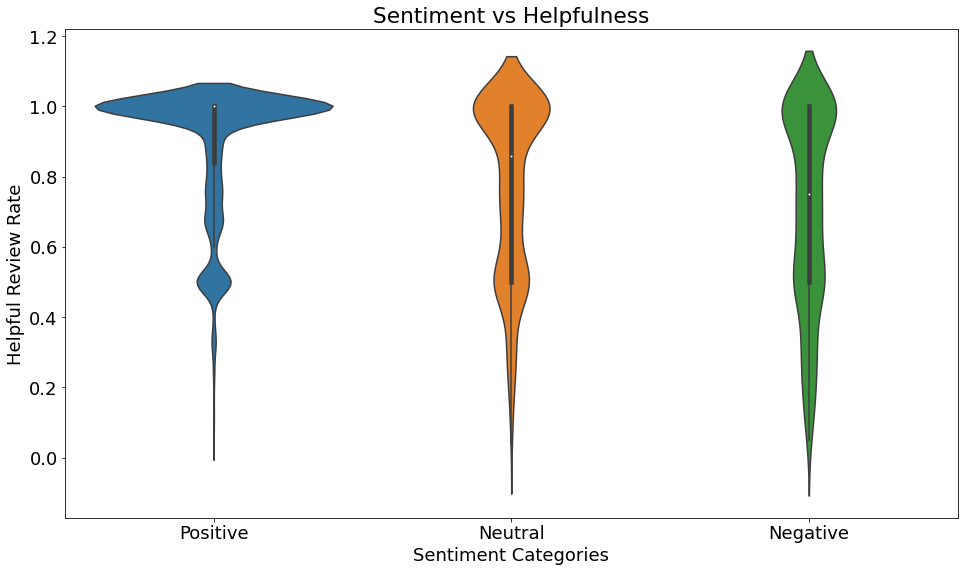

In [ ]:
#plot layout
plt.rcParams.update({'font.size': 18})
rcParams['figure.figsize'] = 16,9

# Creating dataframe and removing 0 helpfulrate records
sentiment_helpful_rate = pd.DataFrame(reviews, columns = ['Sentiment', 'helpful_review'])
sentiment_helpful_rate = sentiment_helpful_rate[sentiment_helpful_rate['helpful_review'] != 0.00] 

#Plotting phase
sns.violinplot( x = sentiment_helpful_rate["Sentiment"], y=sentiment_helpful_rate["helpful_review"])
plt.title('Sentiment vs Helpfulness')
plt.xlabel('Sentiment Categories')
plt.ylabel('Helpful Review Rate')
plt.show()

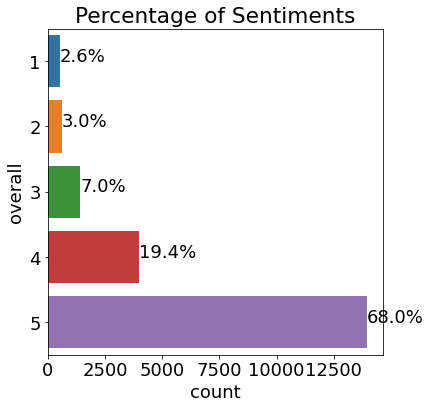

In [ ]:
plt.figure(figsize=(6,6))
plt.title('Percentage of Sentiments')
ax = sns.countplot(y = 'overall', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

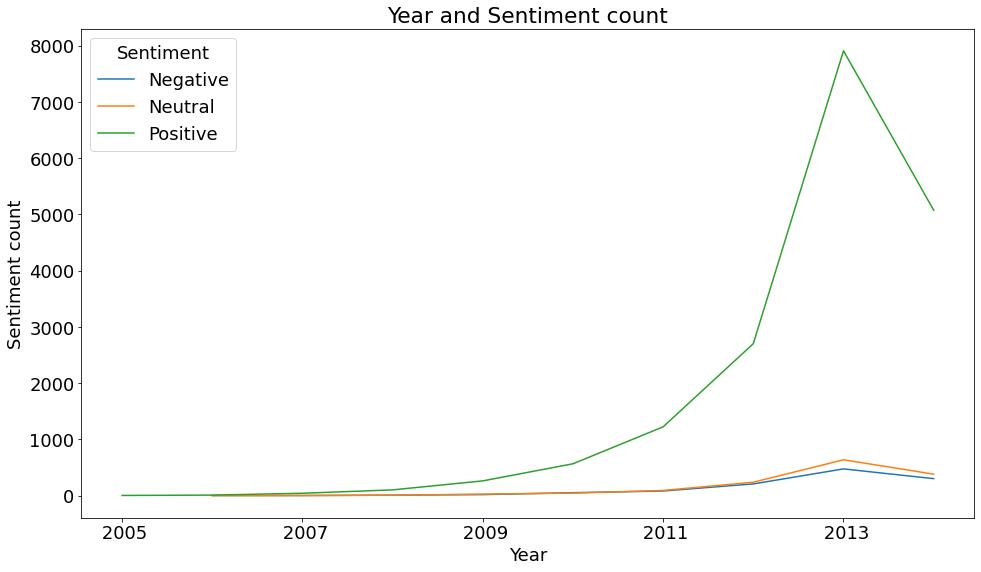

In [ ]:
reviews.groupby(['year','Sentiment'])['Sentiment'].count().unstack().plot(legend=True)
plt.title('Year and Sentiment count')
plt.xlabel('Year')
plt.ylabel('Sentiment count')
plt.show()

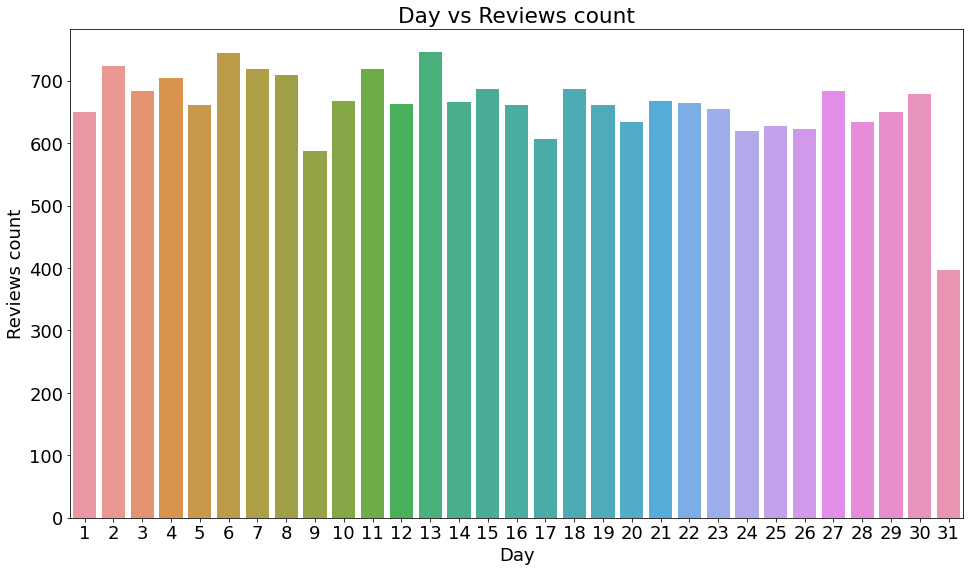

In [ ]:
#Creating a dataframe
dayreview = pd.DataFrame(reviews.groupby('day')['reviews'].count()).reset_index()
dayreview['day'] = dayreview['day'].astype('int64')
dayreview.sort_values(by = ['day'])

#Plotting the graph
sns.barplot(x = "day", y = "reviews", data = dayreview)
plt.title('Day vs Reviews count')
plt.xlabel('Day')
plt.ylabel('Reviews count')
plt.show()

In [ ]:
reviews['polarity'] = reviews['reviews'].map(lambda text: TextBlob(text).sentiment.polarity)
reviews['review_len'] = reviews['reviews'].astype(str).apply(len)
reviews['word_count'] = reviews['reviews'].apply(lambda x: len(str(x).split()))
reviews.head()

reviewerID        asin  overall  unixReviewTime  \
0  A3F73SC1LY51OO  B00002243X        5      1313539200   
1  A20S66SKYXULG2  B00002243X        4      1315094400   
2  A2I8LFSN2IS5EO  B00002243X        5      1374710400   
3  A3GT2EWQSO45ZG  B00002243X        5      1292889600   
4  A3ESWJPAVRPWB4  B00002243X        5      1341360000   

                                             reviews Sentiment   year month  \
0  needed set jumper cable new car good review go...  Positive   2011    08   
1  long cable work fine truck but quality seems l...  Positive   2011    09   
2  cant comment much since not yet used will come...  Positive   2013    07   
3  absolutley love amazon price set cheap booster...  Positive   2010    12   
4  purchased foot long cable set arrived retail c...  Positive   2012    07   

  day  helpful_review                                     tokenized_text  \
0  17             1.0  [needed, set, jumper, cables, new, car, good, ...   
1   4             1.0  [long, cables, work, fine, truck, but, quality...   
2  25             0.0  [cant, comment, much, since, not, yet, used, w...   
3  21             1.0  [absolutley, love, amazon, price, set, cheap, ...   
4   4             0.0  [purchased, feet, long, cable, set, arrived, r...   

                                     lemmatized_text  \
0  [needed, set, jumper, cable, new, car, good, r...   
1  [long, cable, work, fine, truck, but, quality,...   
2  [cant, comment, much, since, not, yet, used, w...   
3  [absolutley, love, amazon, price, set, cheap, ...   
4  [purchased, foot, long, cable, set, arrived, r...   

                                  lemmatized_reviews  polarity  review_len  \
0  needed set jumper cable new car good review go...  0.324886         345   
1  long cable work fine truck but quality seems l...  0.025833         198   
2  cant comment much since not yet used will come...  0.192603         748   
3  absolutley love amazon price set cheap booster...  0.077824        2979   
4  purchased foot long cable set arrived retail c...  0.139167         311   

   word_count  
0          57  
1          33  
2         127  
3         463  
4          47

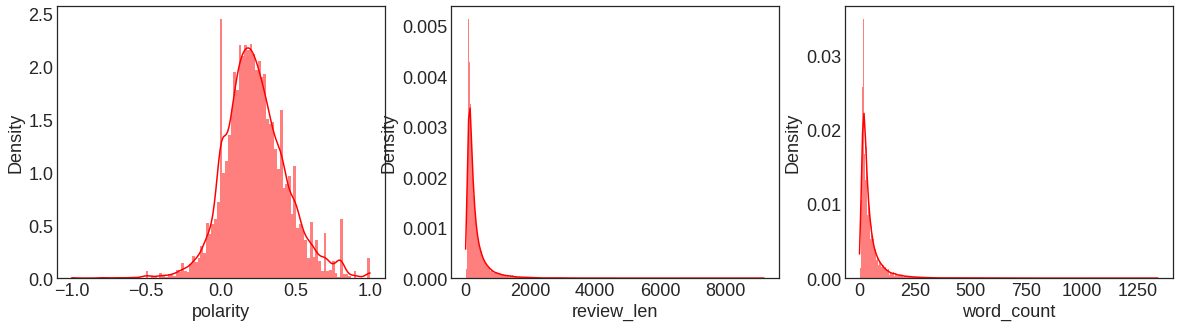

In [ ]:
#Plotting the distribution of the extracted feature
plt.figure(figsize = (20, 5))
plt.xlim(1, 4)
plt.style.use('seaborn-white')
plt.subplot(131)
sns.histplot(reviews['polarity'], color="red", label="100% Equities", kde=True, stat="density", linewidth=0)
fig = plt.gcf()
plt.subplot(132)
sns.histplot(reviews['review_len'], color="red", label="100% Equities", kde=True, stat="density", linewidth=0)
fig = plt.gcf()
plt.subplot(133)
sns.histplot(reviews['word_count'], color="red", label="100% Equities", kde=True, stat="density", linewidth=0)
fig = plt.gcf()

In [ ]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [ ]:
#Filtering data
positive_review = reviews[reviews["Sentiment"]=='Positive'].dropna()
neutral_review = reviews[reviews["Sentiment"]=='Neutral'].dropna()
negative_review = reviews[reviews["Sentiment"]=='Negative'].dropna()

## custom function for ngram generation ##
def generate_ngrams(text, n_gram = 1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

In [ ]:
positive_review

reviewerID        asin  overall  unixReviewTime  \
0      A3F73SC1LY51OO  B00002243X        5      1313539200   
1      A20S66SKYXULG2  B00002243X        4      1315094400   
2      A2I8LFSN2IS5EO  B00002243X        5      1374710400   
3      A3GT2EWQSO45ZG  B00002243X        5      1292889600   
4      A3ESWJPAVRPWB4  B00002243X        5      1341360000   
...               ...         ...      ...             ...   
20465   ACHBPQUWQZMSL  B00KIAQ8VW        5      1384819200   
20468  A1KB43BI085A48  B00KIAQ8VW        5      1396915200   
20470  A1S95WASXJ02VX  B00KIAQ8VW        5      1386547200   
20471  A2IID0Z6EHF5KP  B00KIAQ8VW        5      1357171200   
20472  A3HKZTFCPIK2OE  B00KIAQ8VW        5      1395100800   

                                                 reviews Sentiment   year  \
0      needed set jumper cable new car good review go...  Positive   2011   
1      long cable work fine truck but quality seems l...  Positive   2011   
2      cant comment much since not yet used will come...  Positive   2013   
3      absolutley love amazon price set cheap booster...  Positive   2010   
4      purchased foot long cable set arrived retail c...  Positive   2012   
...                                                  ...       ...    ...   
20465  think cool yet sweet looking half skull mask t...  Positive   2013   
20468  ive bought past year give gift friend club bro...  Positive   2014   
20470  love skull face mask make outstand rest fellow...  Positive   2013   
20471  mask course described halfface but long protec...  Positive   2013   
20472  good light weight cool night rain half helmet ...  Positive   2014   

      month day  helpful_review  \
0        08  17             1.0   
1        09   4             1.0   
2        07  25             0.0   
3        12  21             1.0   
4        07   4             0.0   
...     ...  ..             ...   
20465    11  19             0.0   
20468    04   8             1.0   
20470    12   9             0.0   
20471    01   3             0.0   
20472    03  18             0.0   

                                          tokenized_text  \
0      [needed, set, jumper, cables, new, car, good, ...   
1      [long, cables, work, fine, truck, but, quality...   
2      [cant, comment, much, since, not, yet, used, w...   
3      [absolutley, love, amazon, price, set, cheap, ...   
4      [purchased, feet, long, cable, set, arrived, r...   
...                                                  ...   
20465  [think, cool, yet, sweet, looking, half, skull...   
20468  [ive, bought, past, year, give, gifts, friends...   
20470  [love, skull, face, mask, makes, outstand, res...   
20471  [mask, course, described, halfface, but, long,...   
20472  [good, light, weight, cool, nights, rain, half...   

                                         lemmatized_text  \
0      [needed, set, jumper, cable, new, car, good, r...   
1      [long, cable, work, fine, truck, but, quality,...   
2      [cant, comment, much, since, not, yet, used, w...   
3      [absolutley, love, amazon, price, set, cheap, ...   
4      [purchased, foot, long, cable, set, arrived, r...   
...                                                  ...   
20465  [think, cool, yet, sweet, looking, half, skull...   
20468  [ive, bought, past, year, give, gift, friend, ...   
20470  [love, skull, face, mask, make, outstand, rest...   
20471  [mask, course, described, halfface, but, long,...   
20472  [good, light, weight, cool, night, rain, half,...   

                                      lemmatized_reviews  polarity  \
0      needed set jumper cable new car good review go...  0.324886   
1      long cable work fine truck but quality seems l...  0.025833   
2      cant comment much since not yet used will come...  0.192603   
3      absolutley love amazon price set cheap booster...  0.077824   
4      purchased foot long cable set arrived retail c...  0.139167   
...                                                  ...  

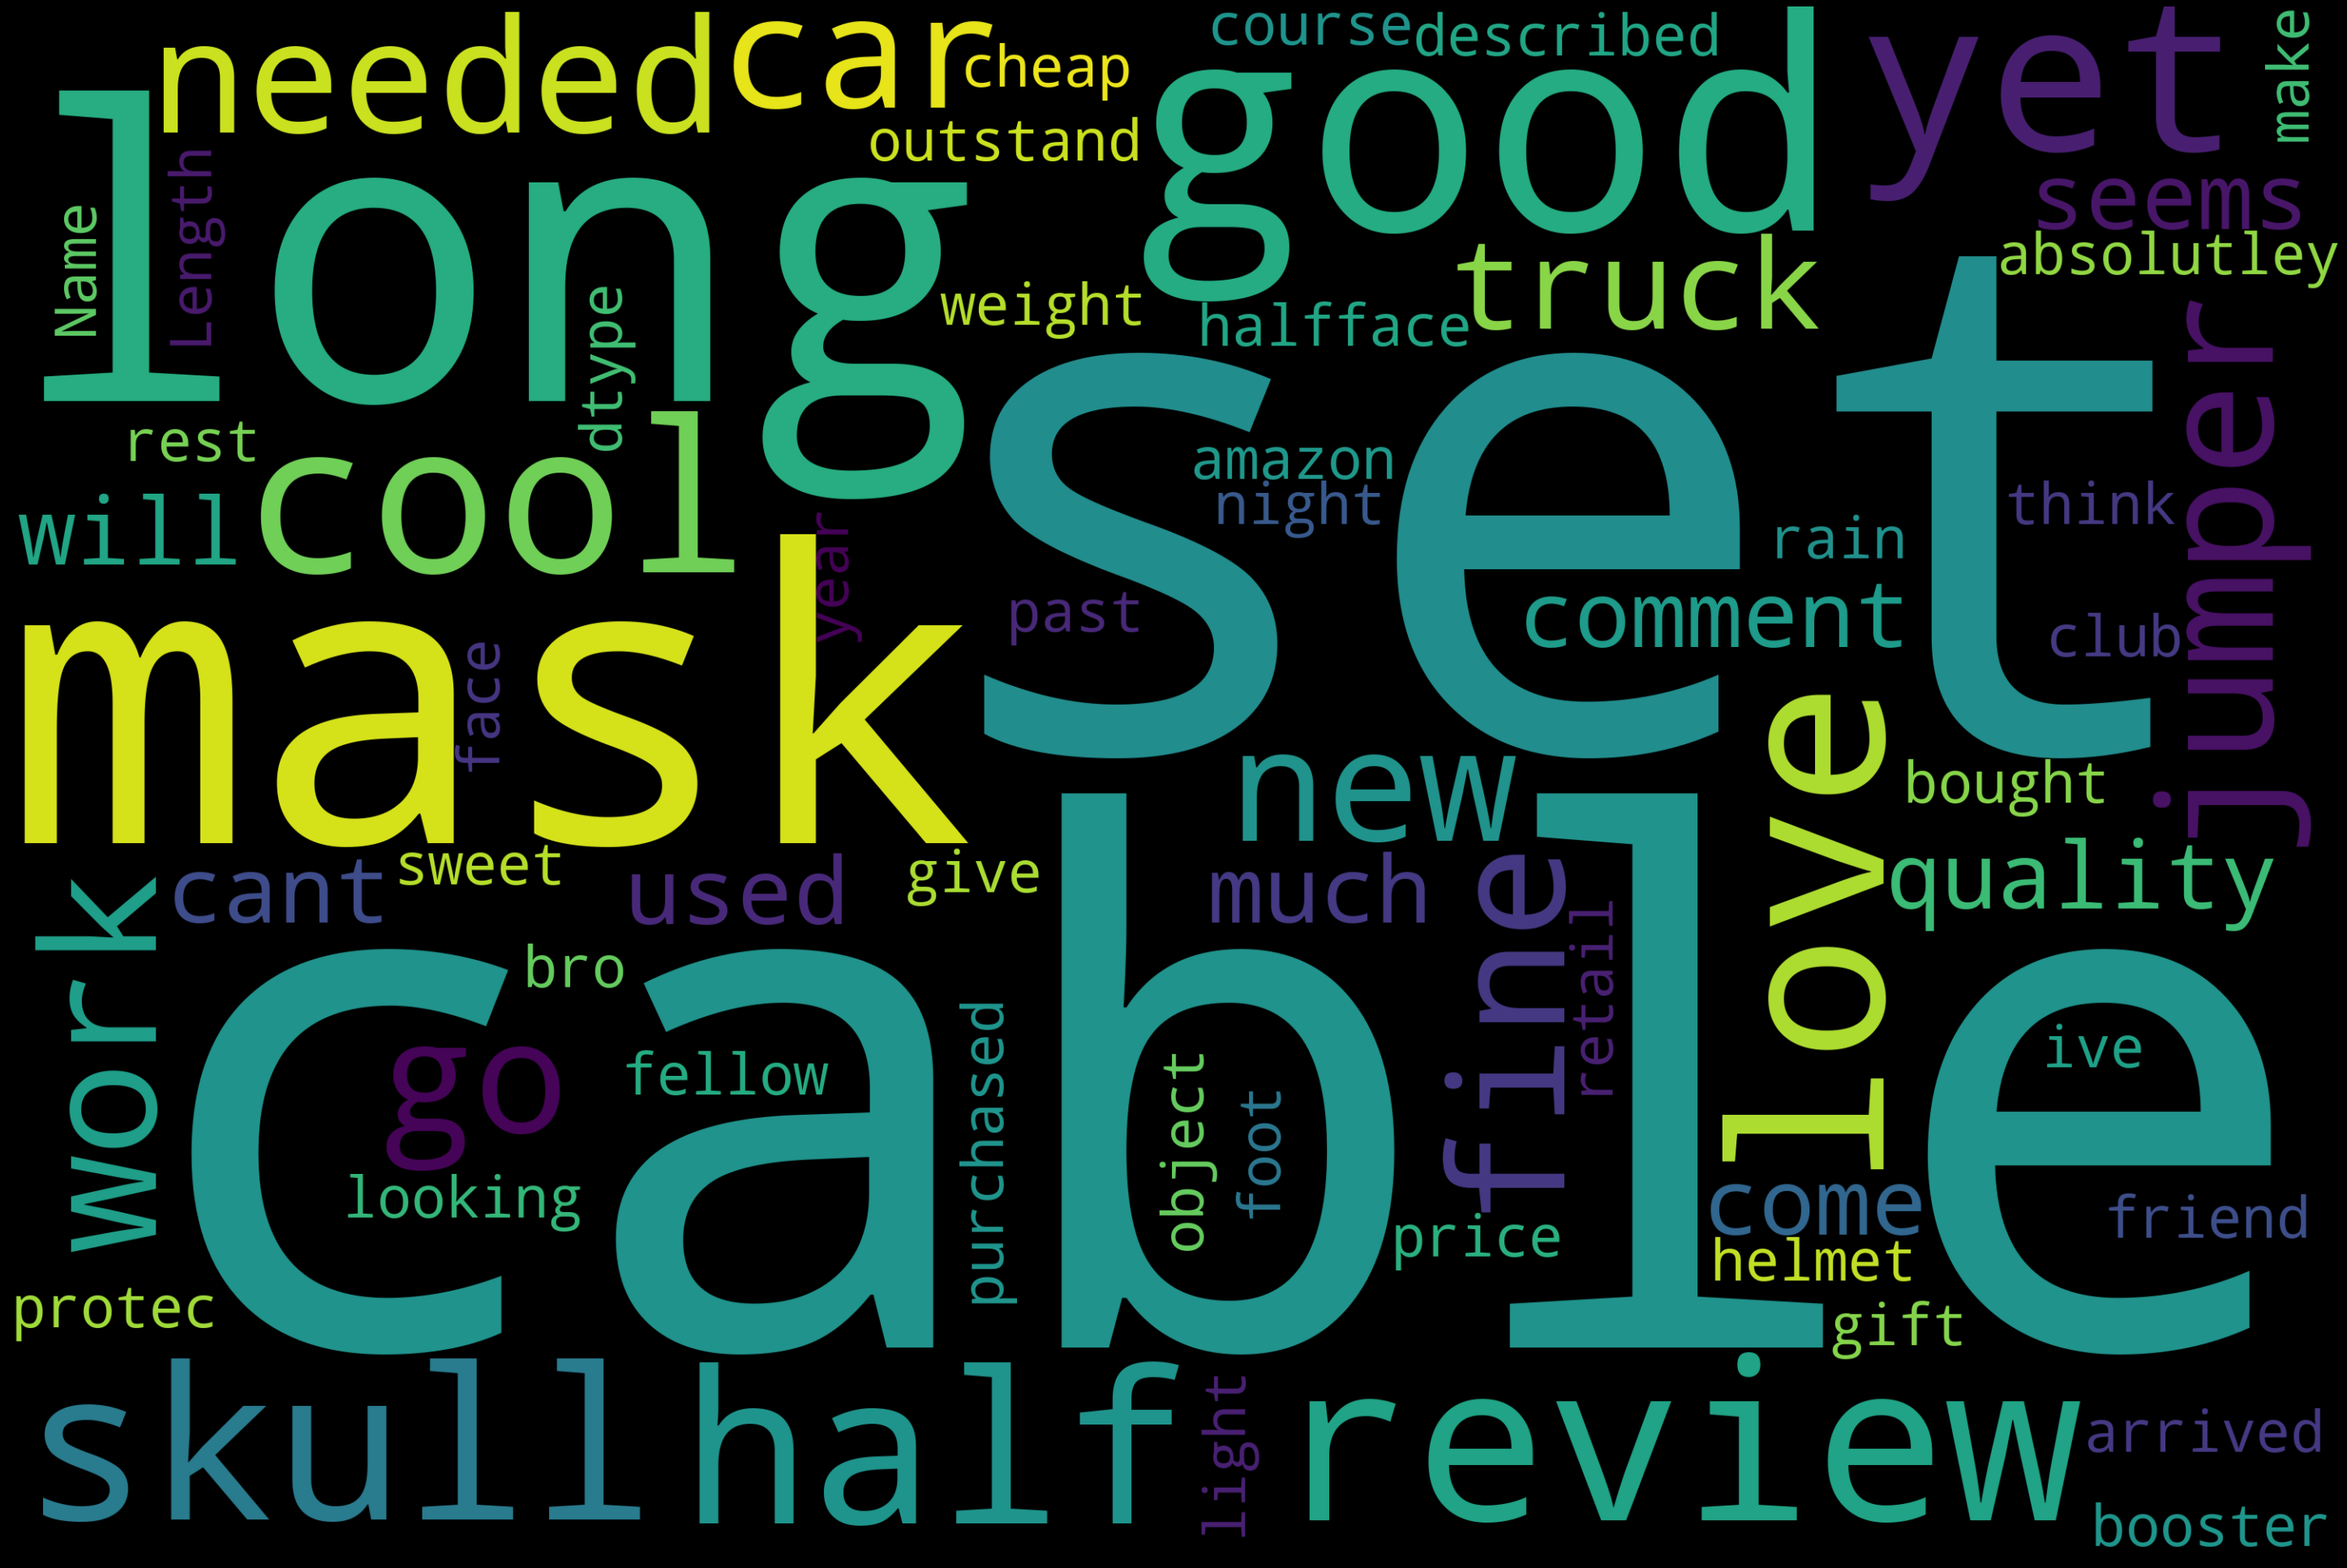

In [ ]:
text = positive_review["reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
neutral_review

reviewerID        asin  overall  unixReviewTime  \
16     A1KKOA3FP2DMBW  B00008BKX5        3      1384473600   
24     A2FJKITDY5UUHJ  B00008RW9U        3      1241654400   
35     A1QF996642YT9L  B00008RW9U        3      1404086400   
47     A2YDD9A0U77LYS  B00008RW9V        3      1359849600   
58     A3NHUQ33CFH3VM  B00009W3G7        3      1368662400   
...               ...         ...      ...             ...   
20445  A2X6J6AFLLYVXH  B00I93BOZ0        3      1397520000   
20457  A1T1YSCDW0PD25  B00JGP8I1S        3      1405123200   
20460  A1EVV74UQYVKRY  B00JGP8I1S        3      1405468800   
20462  A3A4ZAIBQWKOZS  B00JGP8I1S        3      1404345600   
20466  A1TEBSNK5A9XX9  B00KIAQ8VW        3      1394841600   

                                                 reviews Sentiment   year  \
16     product serf purpose use hauling canoe cabing ...   Neutral   2013   
24     product supposed but not real happy quality co...   Neutral   2009   
35     maybe dont understand finer point keeping car ...   Neutral   2014   
47     bought evo x gsr left red lint dash if using h...   Neutral   2013   
58     air deflector make air go side thats piece no ...   Neutral   2013   
...                                                  ...       ...    ...   
20445  basically led light nice addition dash illumin...   Neutral   2014   
20457  interesting product definitely plus minus see ...   Neutral   2014   
20460  im afraid im not sold exactly say but fall sho...   Neutral   2014   
20462  received visor set free review purpose not rec...   Neutral   2014   
20466  honestly dont think worth but fun ok bought on...   Neutral   2014   

      month day  helpful_review  \
16       11  15             0.0   
24       05   7             1.0   
35       06  30             0.0   
47       02   3             0.0   
58       05  16             0.0   
...     ...  ..             ...   
20445    04  15             0.0   
20457    07  12             0.0   
20460    07  16             1.0   
20462    07   3             1.0   
20466    03  15             0.0   

                                          tokenized_text  \
16     [product, serves, purpose, use, hauling, canoe...   
24     [product, supposed, but, not, real, happy, qua...   
35     [maybe, dont, understand, finer, points, keepi...   
47     [bought, evo, x, gsr, left, red, lint, dash, i...   
58     [air, deflector, makes, air, go, side, thats, ...   
...                                                  ...   
20445  [basically, led, lights, nice, addition, dash,...   
20457  [interesting, product, definitely, pluses, min...   
20460  [im, afraid, im, not, sold, exactly, says, but...   
20462  [received, visor, set, free, review, purposes,...   
20466  [honestly, dont, think, worth, but, fun, ok, b...   

                                         lemmatized_text  \
16     [product, serf, purpose, use, hauling, canoe, ...   
24     [product, supposed, but, not, real, happy, qua...   
35     [maybe, dont, understand, finer, point, keepin...   
47     [bought, evo, x, gsr, left, red, lint, dash, i...   
58     [air, deflector, make, air, go, side, thats, p...   
...                                                  ...   
20445  [basically, led, light, nice, addition, dash, ...   
20457  [interesting, product, definitely, plus, minus...   
20460  [im, afraid, im, not, sold, exactly, say, but,...   
20462  [received, visor, set, free, review, purpose, ...   
20466  [honestly, dont, think, worth, but, fun, ok, b...   

                                      lemmatized_reviews  polarity  \
16     product serf purpose use hauling canoe cabing ...  0.083333   
24     product supposed but not real happy quality co... -0.266667   
35     maybe dont understand finer point keeping car ... -0.108333   
47     bought evo x gsr left red lint dash if using h...  0.230952   
58     air deflector make air go side thats piece no ...  0.440741   
...                                                  ...  

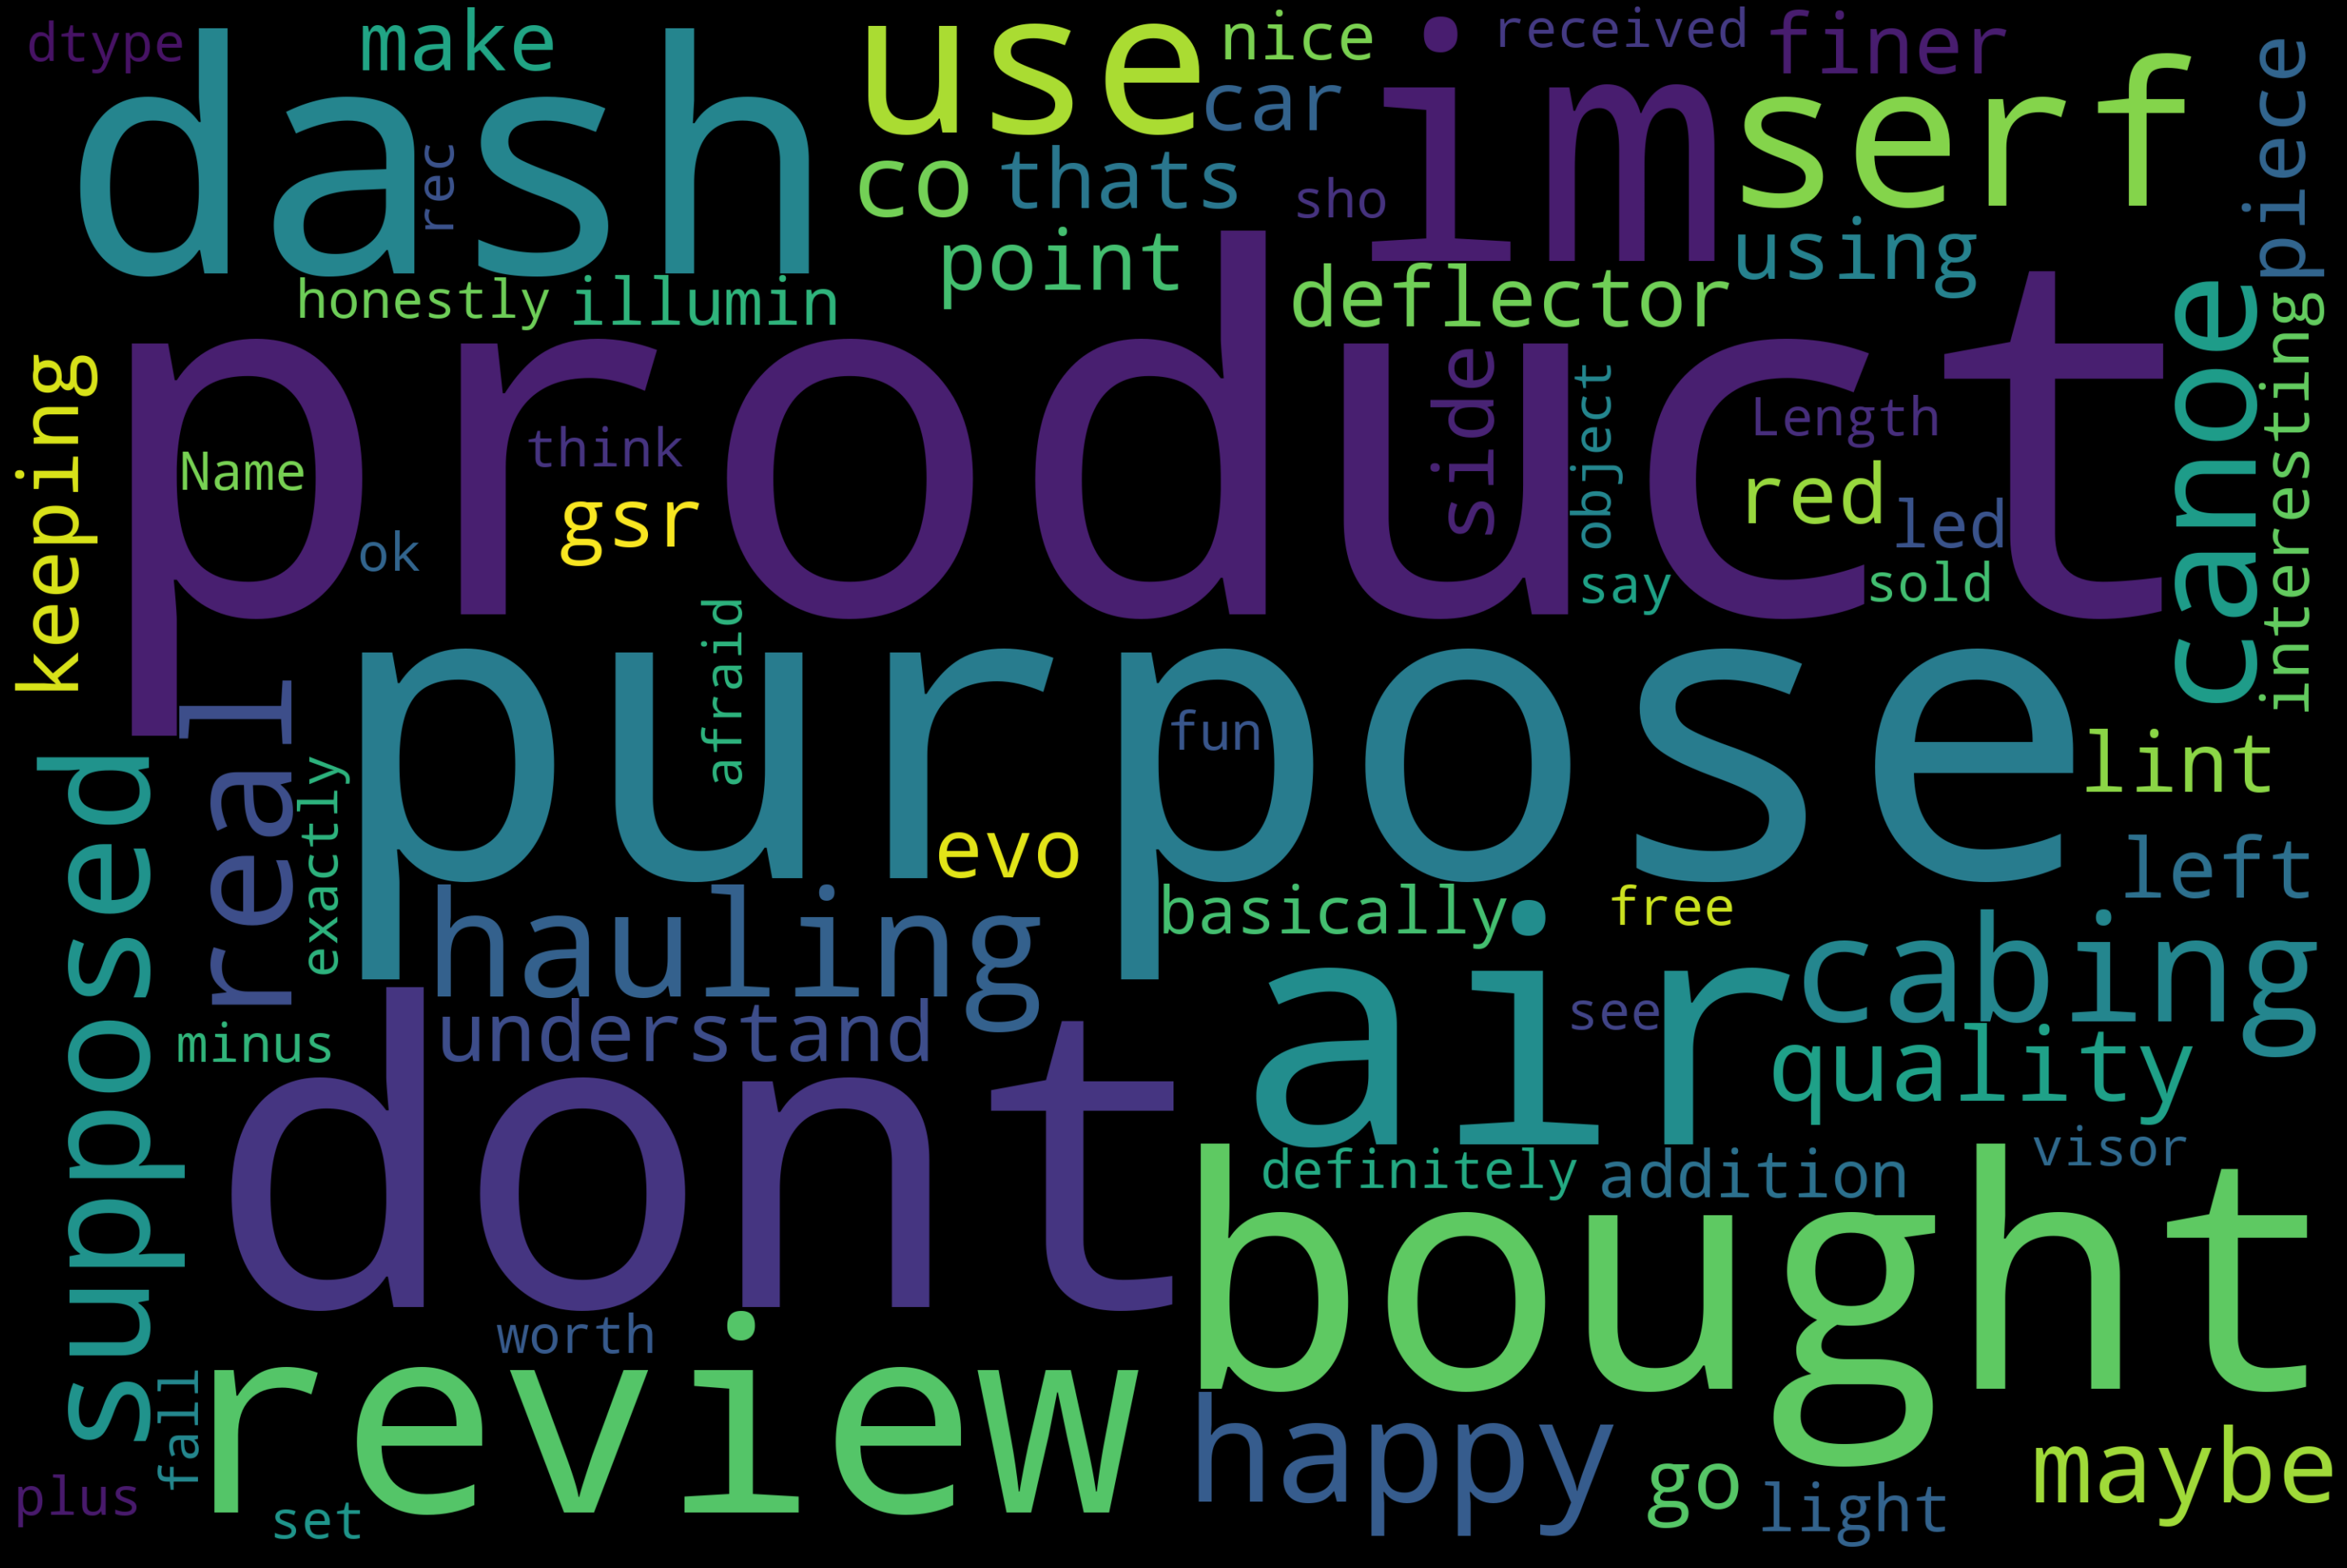

In [ ]:
text = neutral_review["reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
negative_review

reviewerID        asin  overall  unixReviewTime  \
25     A3LYC4BXRDE5RZ  B00008RW9U        2      1248134400   
97     A3FP9141P7DHT6  B0000AXPDU        2      1369872000   
129    A204K1OFE8OB9Y  B0000AXRH5        1      1323129600   
146    A1HI4VM5Q4LUET  B0000AXY62        2      1272585600   
195    A1P3RTQKM8BRBL  B0000AY60S        2      1369872000   
...               ...         ...      ...             ...   
20353  A1PI8VBCXXSGC7  B00H72YE7Y        2      1394496000   
20362  A145B8OHVNNFAJ  B00H72YE7Y        2      1395187200   
20386  A2OS3TIVAKUAHG  B00H72YG9U        2      1394841600   
20467  A212UJA6XIOTUT  B00KIAQ8VW        2      1392076800   
20469  A3HIUWKL4D853W  B00KIAQ8VW        2      1391472000   

                                                 reviews Sentiment   year  \
25     would not buy product but if would stick detal...  Negative   2009   
97     bought spare tire utility trailer inexpensive ...  Negative   2013   
129    size measurement provided bit disingenuous fun...  Negative   2011   
146    using curt receiver length perfect appears hig...  Negative   2010   
195    car rv detail guy car rv must shining new time...  Negative   2013   
...                                                  ...       ...    ...   
20353  knowing red item might bleed decided put towel...  Negative   2014   
20362  basically microfiber towel there no much say s...  Negative   2014   
20386  zwipes set come nice squeegeestyle blade well ...  Negative   2014   
20467  thin material not warm barley break wind cold ...  Negative   2014   
20469  ok admit price item not expectation unfairly h...  Negative   2014   

      month day  helpful_review  \
25       07  21            0.30   
97       05  30            0.00   
129      12   6            0.57   
146      04  30            0.00   
195      05  30            0.88   
...     ...  ..             ...   
20353    03  11            1.00   
20362    03  19            0.00   
20386    03  15            0.00   
20467    02  11            0.00   
20469    02   4            0.00   

                                          tokenized_text  \
25     [would, not, buy, product, but, if, would, sti...   
97     [bought, spare, tire, utility, trailer, inexpe...   
129    [size, measurements, provided, bit, disingenuo...   
146    [using, curt, receiver, length, perfect, appea...   
195    [car, rv, detail, guy, car, rv, must, shining,...   
...                                                  ...   
20353  [knowing, red, items, might, bleed, decided, p...   
20362  [basically, microfiber, towels, theres, no, mu...   
20386  [zwipes, set, comes, nice, squeegeestyle, blad...   
20467  [thin, material, not, warm, barley, breaks, wi...   
20469  [ok, admit, price, item, not, expectations, un...   

                                         lemmatized_text  \
25     [would, not, buy, product, but, if, would, sti...   
97     [bought, spare, tire, utility, trailer, inexpe...   
129    [size, measurement, provided, bit, disingenuou...   
146    [using, curt, receiver, length, perfect, appea...   
195    [car, rv, detail, guy, car, rv, must, shining,...   
...                                                  ...   
20353  [knowing, red, item, might, bleed, decided, pu...   
20362  [basically, microfiber, towel, there, no, much...   
20386  [zwipes, set, come, nice, squeegeestyle, blade...   
20467  [thin, material, not, warm, barley, break, win...   
20469  [ok, admit, price, item, not, expectation, unf...   

                                      lemmatized_reviews  polarity  \
25     would not buy product but if would stick detal...  0.000000   
97     bought spare tire utility trailer inexpensive ...  0.176068   
129    size measurement provided bit disingenuous fun... -0.070000   
146    using curt receiver length perfect appears hig...  0.226942   
195    car rv detail guy car rv must shining new time...  0.250184   
...                                                  ...  

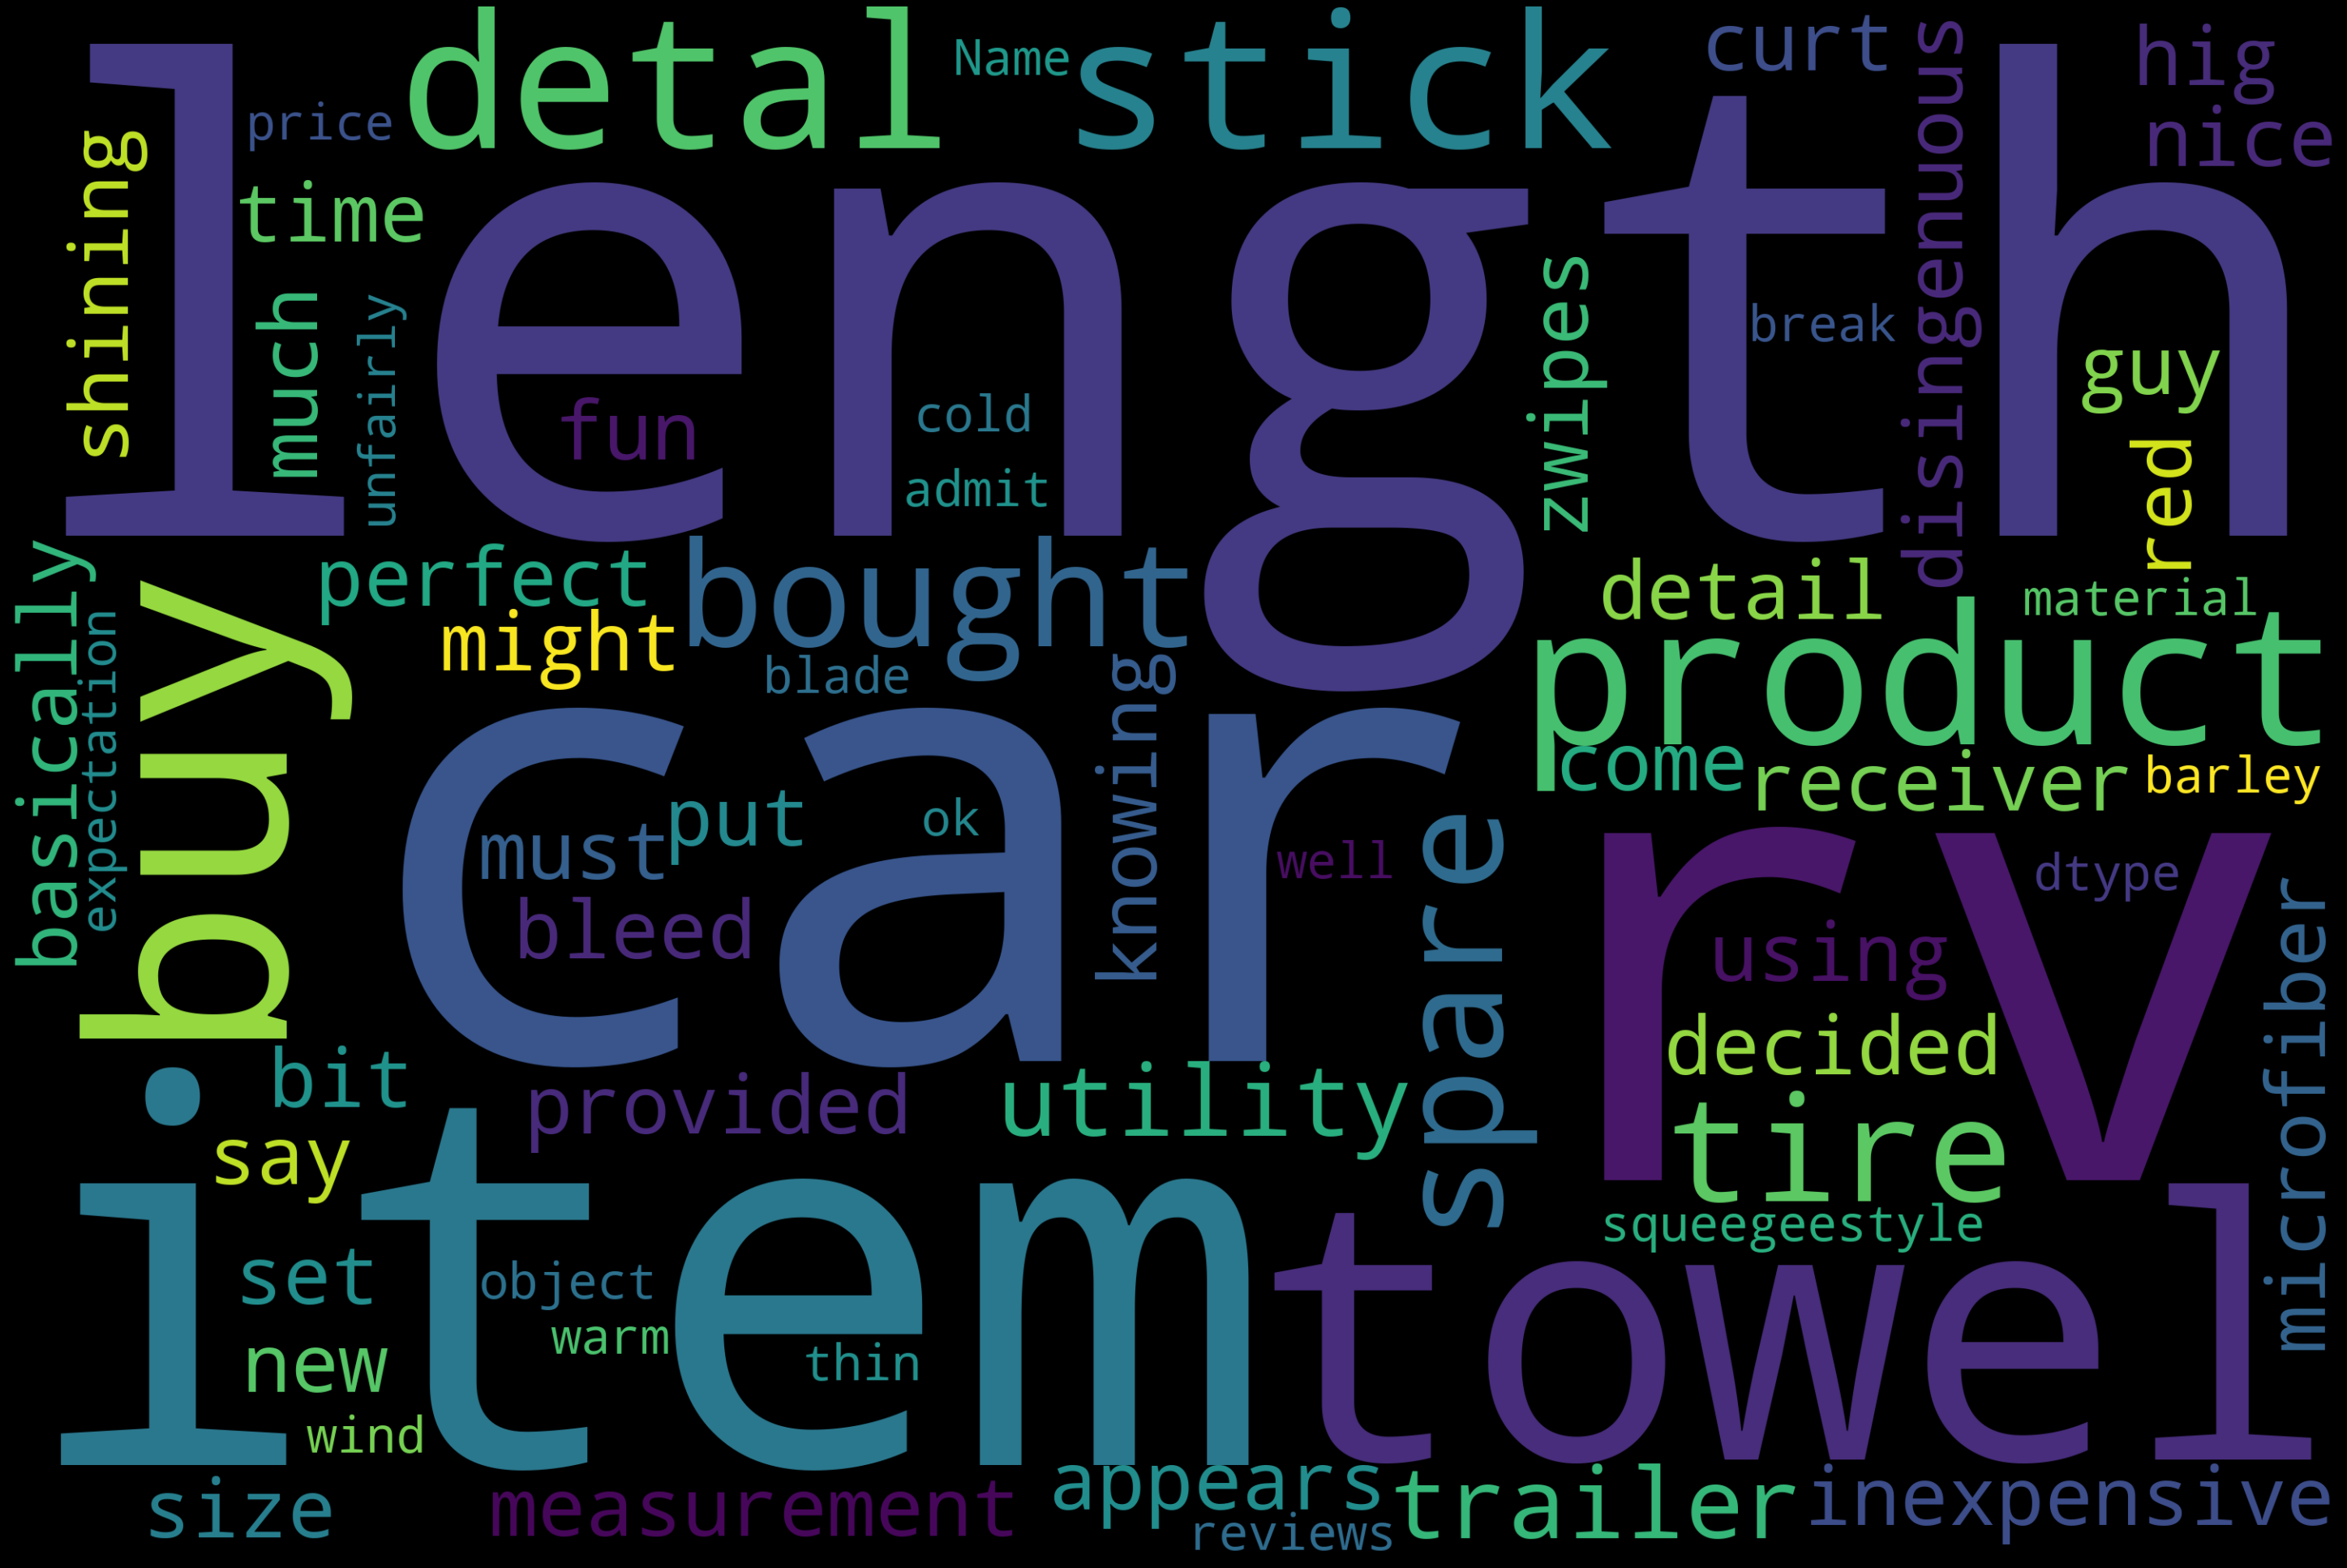

In [ ]:
text = negative_review["reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# calling the label encoder function
le = preprocessing.LabelEncoder() 
  
# Encode labels in column 'sentiment'. 
reviews['Sentiment']= le.fit_transform(reviews['Sentiment']) 

reviews['Sentiment'].unique() 

array([2, 1, 0])

In [ ]:
reviews['Sentiment'].value_counts()

2    17895
1     1430
0     1148
Name: Sentiment, dtype: int64

In [ ]:
#Extracting 'reviews' for processing
review_features = reviews.copy()
review_features = review_features[['reviews']].reset_index(drop=True)
review_features.head()

reviews
0  needed set jumper cable new car good review go...
1  long cable work fine truck but quality seems l...
2  cant comment much since not yet used will come...
3  absolutley love amazon price set cheap booster...
4  purchased foot long cable set arrived retail c...

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features = 5000, ngram_range = (2,2))
# TF-IDF feature matrix
X = tfidf_vectorizer.fit_transform(review_features['reviews'])
X.shape

(20473, 5000)

In [ ]:
#Getting the target variable(encoded)
y = reviews['Sentiment']
y.shape

(20473,)

In [ ]:
print(f'Original dataset shape : {Counter(y)}')

smote = SMOTE(random_state = 61)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(f'Resampled dataset shape : {Counter(y_resampled)}')

Original dataset shape : Counter({2: 17895, 1: 1430, 0: 1148})
Resampled dataset shape : Counter({2: 17895, 1: 17895, 0: 17895})


In [ ]:
## Splitting the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state=0)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Purples):
    """
    This function prints and plots the confusion matrix.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state = 0), param_grid, cv = 5, verbose = 3,n_jobs = -1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:", best_model.score(X_test,y_test))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
LogisticRegression(C=6866.488450042998, random_state=0)
The mean accuracy of the model is: 0.9294961348607619


In [ ]:
logreg = LogisticRegression(C = 10000, random_state = 0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on train set: 0.97
Accuracy of logistic regression classifier on test set: 0.93


In [ ]:
#performance metrices
accuracy0 = metrics.accuracy_score(y_test,y_pred)*100
print("Accuracy: ", round(accuracy0, 2))

precision0 = metrics.precision_score(y_test,y_pred, average='weighted')*100
print("Precision: ", round(precision0, 2))

recall0 = metrics.recall_score(y_test,y_pred, average='macro')*100
print("Recall: ", round(recall0, 2))

f1_score0 = metrics.f1_score(y_test,y_pred, average='weighted')*100
print("F1 Score:", round(f1_score0, 2))

Accuracy:  92.9
Precision:  93.29
Recall:  92.95
F1 Score: 92.78


Confusion matrix, without normalization


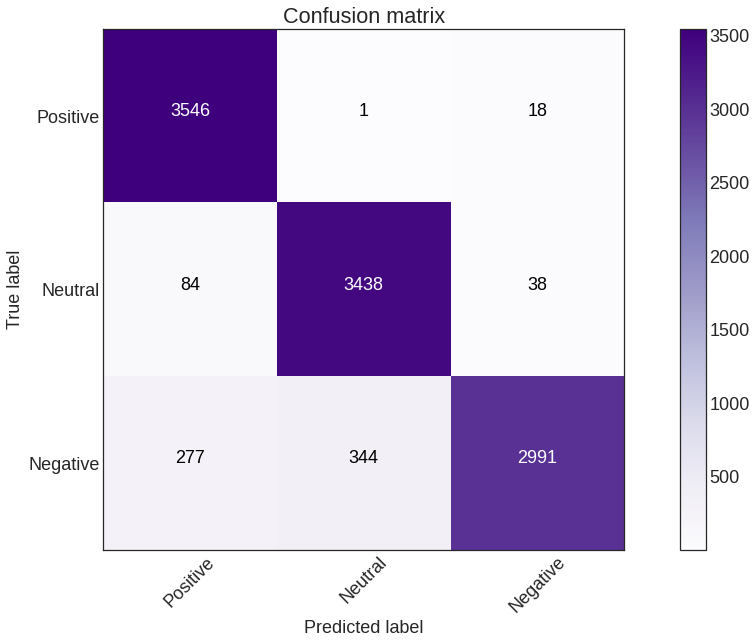

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['Positive','Neutral','Negative'])

In [ ]:
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      3565
           1       0.91      0.97      0.94      3560
           2       0.98      0.83      0.90      3612

    accuracy                           0.93     10737
   macro avg       0.93      0.93      0.93     10737
weighted avg       0.93      0.93      0.93     10737



In [ ]:
# create and train the Naive Bayes Classifier
classifier = MultinomialNB()
ovr = OneVsRestClassifier(classifier)
ovr.fit(X_train, y_train)
y_pred = ovr.predict(X_test)

In [ ]:
#performance metrices
accuracy0 = metrics.accuracy_score(y_test,y_pred)*100
print("Accuracy: ", round(accuracy0, 2))

precision0 = metrics.precision_score(y_test,y_pred, average='weighted')*100
print("Precision: ", round(precision0, 2))

recall0 = metrics.recall_score(y_test,y_pred, average='macro')*100
print("Recall: ", round(recall0, 2))

f1_score0 = metrics.f1_score(y_test,y_pred, average='weighted')*100
print("F1 Score:", round(f1_score0, 2))

Accuracy:  81.2
Precision:  81.74
Recall:  81.24
F1 Score: 81.12


Confusion matrix, without normalization


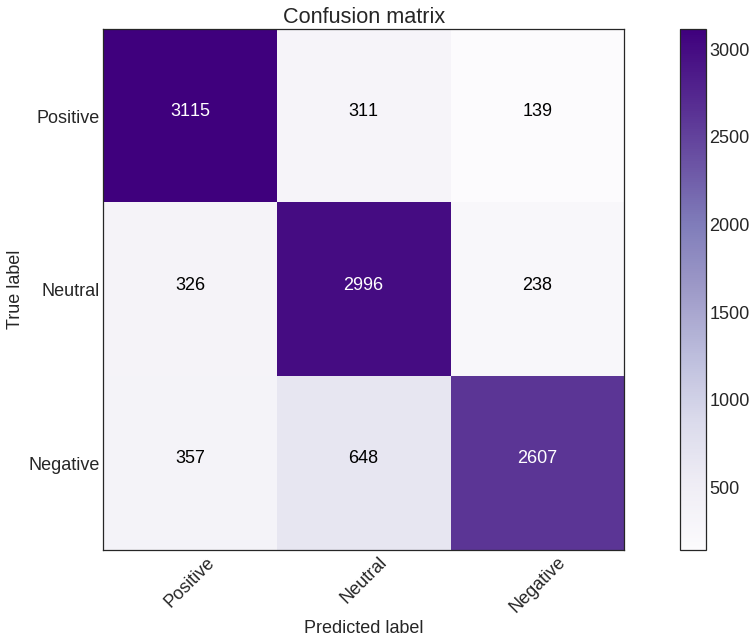

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['Positive','Neutral','Negative'])

In [ ]:
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.85      3565
           1       0.76      0.84      0.80      3560
           2       0.87      0.72      0.79      3612

    accuracy                           0.81     10737
   macro avg       0.82      0.81      0.81     10737
weighted avg       0.82      0.81      0.81     10737



In [ ]:
#cross-validation
cv0 = cross_val_score(classifier, X, y, cv=10, scoring='accuracy', n_jobs=-10)*100
print(cv0)
print("Cross Validation:", round(cv0.mean(), 2))

[87.5        87.45117188 87.59765625 87.54274548 87.54274548 87.34733757
 87.4938935  87.29848559 87.39618955 87.00537372]
Cross Validation: 87.42


In [ ]:
svm = LinearSVC()

ovr_classifier = OneVsRestClassifier(svm)

ovr_classifier.fit(X_train,y_train)
y_pred = ovr_classifier.predict(X_test)

In [ ]:
#performance metrices
accuracy0 = metrics.accuracy_score(y_test,y_pred)*100
print("Accuracy: ", round(accuracy0, 2))

precision0 = metrics.precision_score(y_test,y_pred, average='weighted')*100
print("Precision: ", round(precision0, 2))

recall0 = metrics.recall_score(y_test,y_pred, average='macro')*100
print("Recall: ", round(recall0, 2))

f1_score0 = metrics.f1_score(y_test,y_pred, average='weighted')*100
print("F1 Score:", round(f1_score0, 2))

Accuracy:  89.37
Precision:  90.22
Recall:  89.43
F1 Score: 89.2


Confusion matrix, without normalization


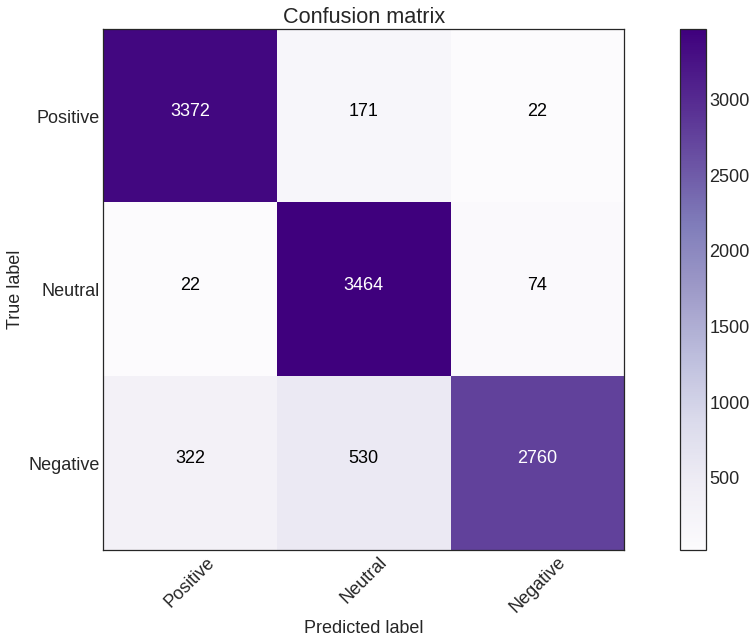

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['Positive','Neutral','Negative'])

In [ ]:
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93      3565
           1       0.83      0.97      0.90      3560
           2       0.97      0.76      0.85      3612

    accuracy                           0.89     10737
   macro avg       0.90      0.89      0.89     10737
weighted avg       0.90      0.89      0.89     10737



In [ ]:
#cross-validation
cv0 = cross_val_score(svm, X, y, cv=10, scoring='accuracy', n_jobs=-10)*100
print(cv0)
print("Cross Validation:", round(cv0.mean(), 2))

[87.5        87.40234375 87.45117188 87.10307767 87.59159746 87.10307767
 86.71226185 85.88177821 86.90766976 85.78407426]
Cross Validation: 86.94


In [ ]:
classifier = KNeighborsClassifier(n_neighbors=6)
ovr = OneVsRestClassifier(classifier)
ovr.fit(X_train, y_train)
y_pred = ovr.predict(X_test)

In [ ]:
#performance metrices
accuracy0 = metrics.accuracy_score(y_test,y_pred)*100
print("Accuracy: ", round(accuracy0, 2))

precision0 = metrics.precision_score(y_test,y_pred, average='weighted')*100
print("Precision: ", round(precision0, 2))

recall0 = metrics.recall_score(y_test,y_pred, average='macro')*100
print("Recall: ", round(recall0, 2))

f1_score0 = metrics.f1_score(y_test,y_pred, average='weighted')*100
print("F1 Score:", round(f1_score0, 2))

Accuracy:  65.05
Precision:  64.98
Recall:  65.3
F1 Score: 56.7


Confusion matrix, without normalization


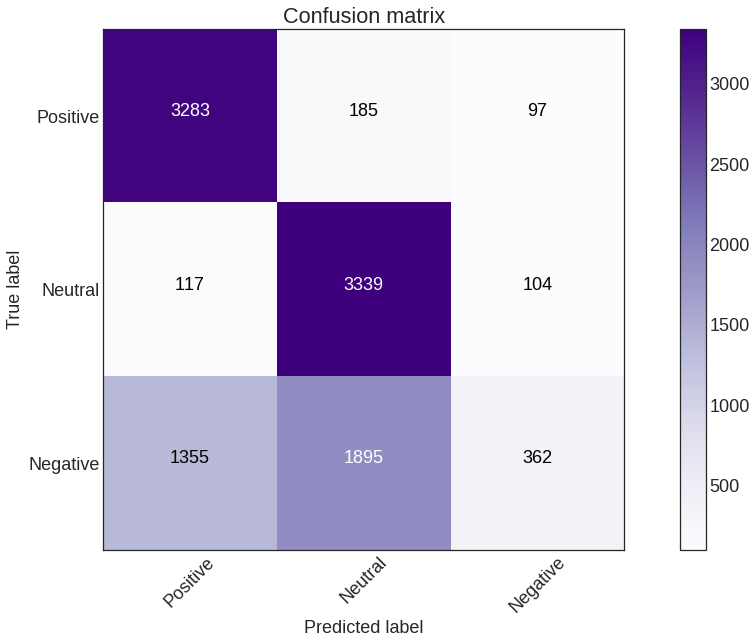

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['Positive','Neutral','Negative'])

In [ ]:
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.92      0.79      3565
           1       0.62      0.94      0.74      3560
           2       0.64      0.10      0.17      3612

    accuracy                           0.65     10737
   macro avg       0.65      0.65      0.57     10737
weighted avg       0.65      0.65      0.57     10737



In [ ]:
#cross-validation
cv0 = cross_val_score(classifier, X, y, cv=10, scoring='accuracy', n_jobs=-10)*100
print(cv0)
print("Cross Validation:", round(cv0.mean(), 2))

[87.01171875 87.15820312 87.01171875 86.71226185 87.10307767 86.71226185
 86.46800195 86.02833415 86.85881778 86.95652174]
Cross Validation: 86.8


In [ ]:
classifier = LogisticRegression(C = 10000)
ovr = OneVsRestClassifier(classifier)
ovr.fit(X_train, y_train)
y_pred = ovr.predict(X_test)

In [ ]:
#performance metrices
accuracy0 = metrics.accuracy_score(y_test,y_pred)*100
print("Accuracy: ", round(accuracy0, 2))

precision0 = metrics.precision_score(y_test,y_pred, average='weighted')*100
print("Precision: ", round(precision0, 2))

recall0 = metrics.recall_score(y_test,y_pred, average='macro')*100
print("Recall: ", round(recall0, 2))

f1_score0 = metrics.f1_score(y_test,y_pred, average='weighted')*100
print("F1 Score:", round(f1_score0, 2))

Accuracy:  92.65
Precision:  93.29
Recall:  92.7
F1 Score: 92.54


Confusion matrix, without normalization


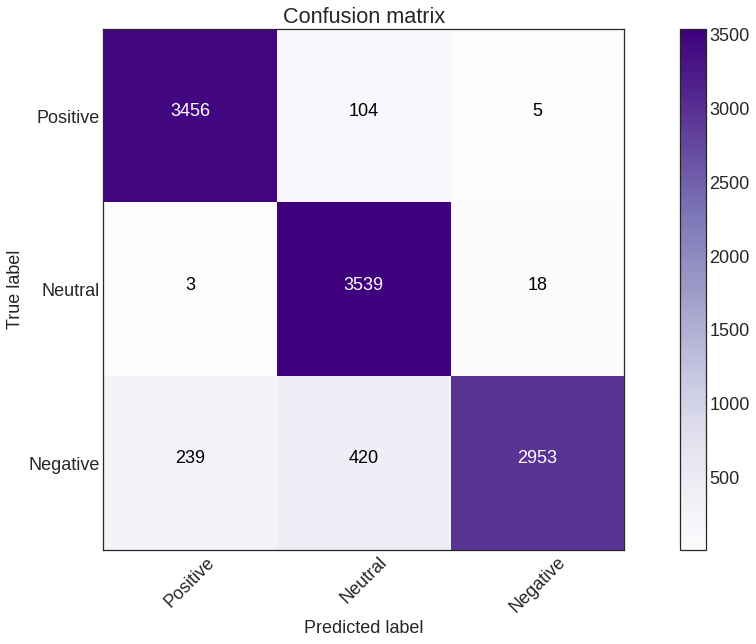

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['Positive','Neutral','Negative'])

In [ ]:
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      3565
           1       0.87      0.99      0.93      3560
           2       0.99      0.82      0.90      3612

    accuracy                           0.93     10737
   macro avg       0.93      0.93      0.93     10737
weighted avg       0.93      0.93      0.93     10737



In [ ]:
#cross-validation
cv0 = cross_val_score(classifier, X, y, cv=10, scoring='accuracy', n_jobs=-10)*100
print(cv0)
print("Cross Validation:", round(cv0.mean(), 2))

[83.44726562 83.54492188 83.7890625  81.77821202 82.46213972 82.75525159
 82.07132389 80.4592086  81.48510015 82.07132389]
Cross Validation: 82.39


In [ ]:
# @title Random Forest
rf = RandomForestClassifier(n_estimators=10,criterion = 'gini', random_state=0)
ovr = OneVsRestClassifier(rf)
ovr.fit(X_train, y_train)
y_pred = ovr.predict(X_test)

In [ ]:
#performance metrices
accuracy0 = metrics.accuracy_score(y_test,y_pred)*100
print("Accuracy: ", round(accuracy0, 2))

precision0 = metrics.precision_score(y_test,y_pred, average='weighted')*100
print("Precision: ", round(precision0, 2))

recall0 = metrics.recall_score(y_test,y_pred, average='macro')*100
print("Recall: ", round(recall0, 2))

f1_score0 = metrics.f1_score(y_test,y_pred, average='weighted')*100
print("F1 Score:", round(f1_score0, 2))

Accuracy:  92.92
Precision:  93.01
Recall:  92.95
F1 Score: 92.86


Confusion matrix, without normalization


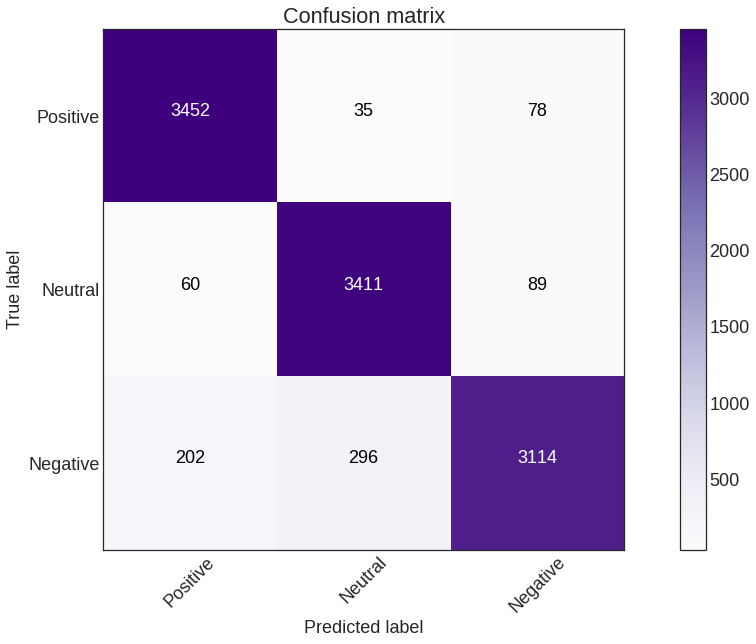

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['Positive','Neutral','Negative'])

In [ ]:
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      3565
           1       0.91      0.96      0.93      3560
           2       0.95      0.86      0.90      3612

    accuracy                           0.93     10737
   macro avg       0.93      0.93      0.93     10737
weighted avg       0.93      0.93      0.93     10737



In [ ]:
#cross-validation
cv0 = cross_val_score(rf, X, y, cv=10, scoring='accuracy', n_jobs=-10)*100
print(cv0)
print("Cross Validation:", round(cv0.mean(), 2))

[86.37695312 85.98632812 86.62109375 85.24670249 86.56570591 86.95652174
 85.6863703  85.83292623 86.1260381  85.53981436]
Cross Validation: 86.09


In [ ]:
#creating the objects
logreg = LogisticRegression()
knn = KNeighborsClassifier()
svc = LinearSVC()
nb = MultinomialNB()
rf = RandomForestClassifier()
cv_dict = {0: 'Logistic Regression', 1:'KNN', 2:'SVC', 3:'Naive Bayes', 4: 'Random Forest'}
cv_models = [logreg, knn, svc, nb, rf]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv = 10, scoring = 'accuracy').mean()))

Logistic Regression Test Accuracy: 0.8789623295905594
KNN Test Accuracy: 0.8659696354421105
SVC Test Accuracy: 0.8694370525082438
Naive Bayes Test Accuracy: 0.8741755990092208
Random Forest Test Accuracy: 0.869192959590254


In [ ]:
#BoW (Bag of Words) model
bow = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, max_features = None, ngram_range = (1,1))
X1 = bow.fit_transform(review_features['reviews'])
X1.shape

(20473, 53574)

In [ ]:
y1 = reviews['Sentiment']
y1.shape

(20473,)

In [ ]:
print(f'Original dataset shape : {Counter(y1)}')

smote = SMOTE(random_state = 21)
X1_resampled, y1_resampled = smote.fit_resample(X1, y1)

print(f'Resampled dataset shape {Counter(y1_resampled)}')

Original dataset shape : Counter({2: 17895, 1: 1430, 0: 1148})
Resampled dataset shape Counter({2: 17895, 1: 17895, 0: 17895})


In [ ]:
## Splitting the dataset into Train and Test
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_resampled, y1_resampled, test_size = 0.2, random_state=0)

In [ ]:
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state = 0), param_grid, cv = 5, verbose = 3,n_jobs = -1)
best_model = clf.fit(X1_train,y1_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:", best_model.score(X1_test,y1_test))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
LogisticRegression(C=16.768329368110066, random_state=0)
The mean accuracy of the model is: 0.8222035950451709


In [ ]:
logreg = LogisticRegression(C = 16.768, random_state = 0)
logreg.fit(X1_train, y1_train)
y1_pred = logreg.predict(X1_test)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X1_train, y1_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X1_test, y1_test)))

Accuracy of logistic regression classifier on train set: 0.89
Accuracy of logistic regression classifier on test set: 0.82


In [ ]:
#performance metrices
accuracy1 = metrics.accuracy_score(y1_test,y1_pred)*100
print("Accuracy: ", round(accuracy1, 2))

precision1 = metrics.precision_score(y1_test,y1_pred, average='weighted')*100
print("Precision: ", round(precision1, 2))

recall1 = metrics.recall_score(y1_test,y1_pred, average='macro')*100
print("Recall: ", round(recall1, 2))

f1_score1 = metrics.f1_score(y1_test,y1_pred, average='weighted')*100
print("F1 Score:", round(f1_score1, 2))

Accuracy:  81.66
Precision:  82.45
Recall:  81.64
F1 Score: 81.77


Confusion matrix, without normalization


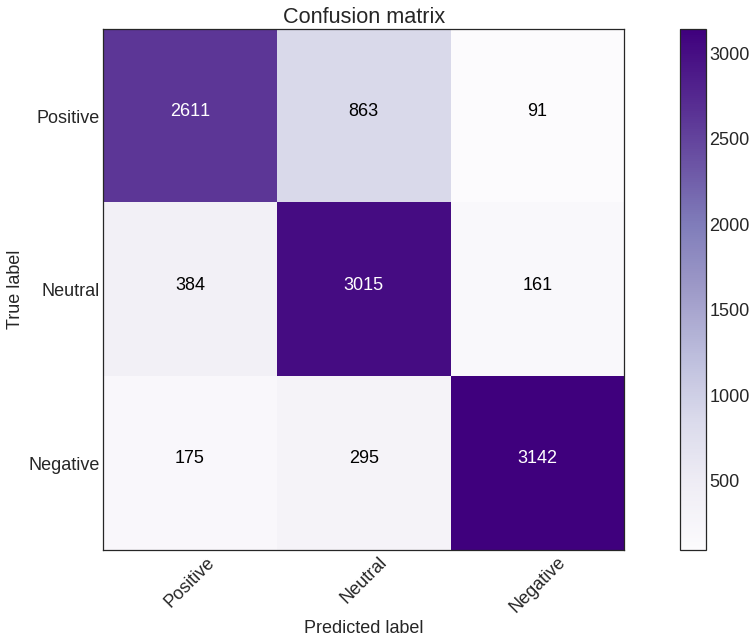

In [ ]:
cm = metrics.confusion_matrix(y1_test, y1_pred)
plot_confusion_matrix(cm, classes = ['Positive','Neutral','Negative'])

In [ ]:
print("Classification Report:\n",classification_report(y1_test, y1_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.73      0.78      3565
           1       0.72      0.85      0.78      3560
           2       0.93      0.87      0.90      3612

    accuracy                           0.82     10737
   macro avg       0.82      0.82      0.82     10737
weighted avg       0.82      0.82      0.82     10737



In [ ]:
# create and train the Naive Bayes Classifier
classifier = MultinomialNB()
ovr = OneVsRestClassifier(classifier)
ovr.fit(X1_train, y1_train)
y1_pred = ovr.predict(X1_test)

In [ ]:
#performance metrices
accuracy1 = metrics.accuracy_score(y1_test,y1_pred)*100
print("Accuracy: ", round(accuracy1, 2))

precision1 = metrics.precision_score(y1_test,y1_pred, average='weighted')*100
print("Precision: ", round(precision1, 2))

recall1 = metrics.recall_score(y1_test,y1_pred, average='macro')*100
print("Recall: ", round(recall1, 2))

f1_score1 = metrics.f1_score(y1_test,y1_pred, average='weighted')*100
print("F1 Score:", round(f1_score1, 2))

Accuracy:  73.83
Precision:  74.06
Recall:  73.75
F1 Score: 73.28


Confusion matrix, without normalization


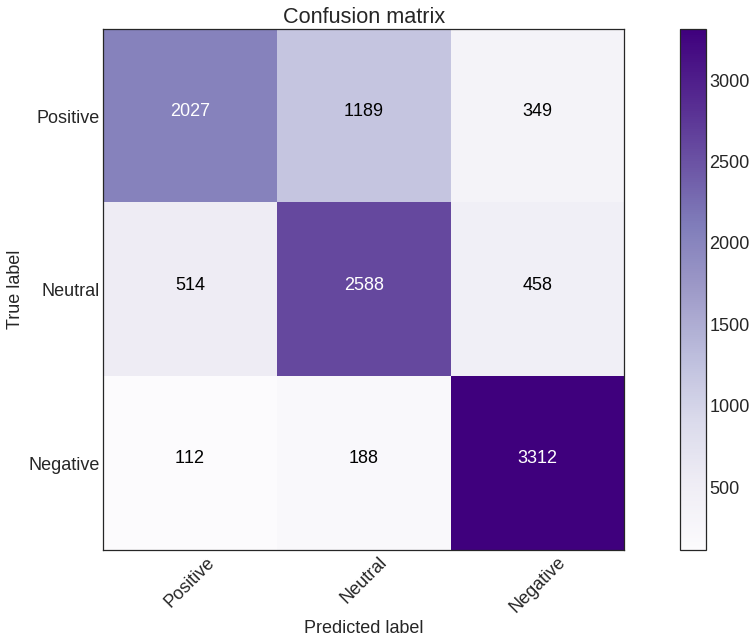

In [ ]:
cm = metrics.confusion_matrix(y1_test, y1_pred)
plot_confusion_matrix(cm, classes = ['Positive','Neutral','Negative'])

In [ ]:
print("Classification Report:\n",classification_report(y1_test, y1_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.57      0.65      3565
           1       0.65      0.73      0.69      3560
           2       0.80      0.92      0.86      3612

    accuracy                           0.74     10737
   macro avg       0.74      0.74      0.73     10737
weighted avg       0.74      0.74      0.73     10737



In [ ]:
#cross-validation
cv1 = cross_val_score(classifier, X1, y1, cv=10, scoring='accuracy', n_jobs=-10)*100
print(cv1)
print("Cross Validation:", round(cv1.mean(), 2))

[87.5        87.25585938 86.96289062 87.10307767 87.39618955 87.0542257
 87.20078163 86.61455789 87.10307767 87.00537372]
Cross Validation: 87.12


In [ ]:
svm = LinearSVC()

ovr_classifier = OneVsRestClassifier(svm)

ovr_classifier.fit(X1_train,y1_train)
y1_pred = ovr_classifier.predict(X1_test)

In [ ]:
#performance metrices
accuracy1 = metrics.accuracy_score(y1_test,y1_pred)*100
print("Accuracy: ", round(accuracy1, 2))

precision1 = metrics.precision_score(y1_test,y1_pred, average='weighted')*100
print("Precision: ", round(precision1, 2))

recall1 = metrics.recall_score(y1_test,y1_pred, average='macro')*100
print("Recall: ", round(recall1, 2))

f1_score1 = metrics.f1_score(y1_test,y1_pred, average='weighted')*100
print("F1 Score:", round(f1_score1, 2))

Accuracy:  81.68
Precision:  82.37
Recall:  81.66
F1 Score: 81.7


Confusion matrix, without normalization


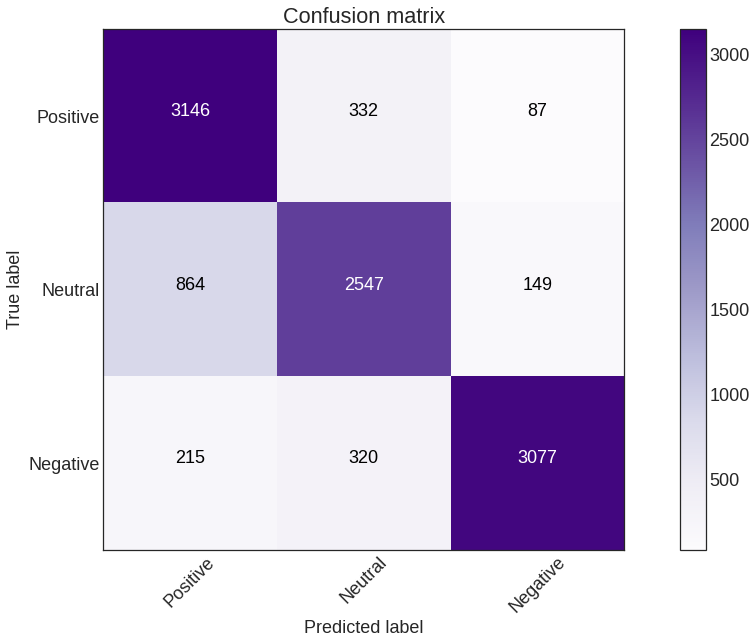

In [ ]:
cm = metrics.confusion_matrix(y1_test, y1_pred)
plot_confusion_matrix(cm, classes = ['Positive','Neutral','Negative'])

In [ ]:
print("Classification Report:\n",classification_report(y1_test, y1_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.88      0.81      3565
           1       0.80      0.72      0.75      3560
           2       0.93      0.85      0.89      3612

    accuracy                           0.82     10737
   macro avg       0.82      0.82      0.82     10737
weighted avg       0.82      0.82      0.82     10737



In [ ]:
#cross-validation
cv1 = cross_val_score(svm, X1, y1, cv=10, scoring='accuracy', n_jobs=-10)*100
print(cv1)
print("Cross Validation:", round(cv1.mean(), 2))

[86.23046875 87.3046875  85.98632812 86.46800195 86.8099658  85.93063019
 84.75818271 84.80703468 85.24670249 84.75818271]
Cross Validation: 85.83


In [ ]:
classifier = KNeighborsClassifier(n_neighbors=6)
ovr = OneVsRestClassifier(classifier)
ovr.fit(X1_train, y1_train)
y1_pred = ovr.predict(X1_test)

In [ ]:
#performance metrices
accuracy1 = metrics.accuracy_score(y1_test,y1_pred)*100
print("Accuracy: ", round(accuracy1, 2))

precision1 = metrics.precision_score(y1_test,y1_pred, average='weighted')*100
print("Precision: ", round(precision1, 2))

recall1 = metrics.recall_score(y1_test,y1_pred, average='macro')*100
print("Recall: ", round(recall1, 2))

f1_score1 = metrics.f1_score(y1_test,y1_pred, average='weighted')*100
print("F1 Score:", round(f1_score1, 2))

Accuracy:  59.6
Precision:  72.8
Recall:  59.85
F1 Score: 49.42


Confusion matrix, without normalization


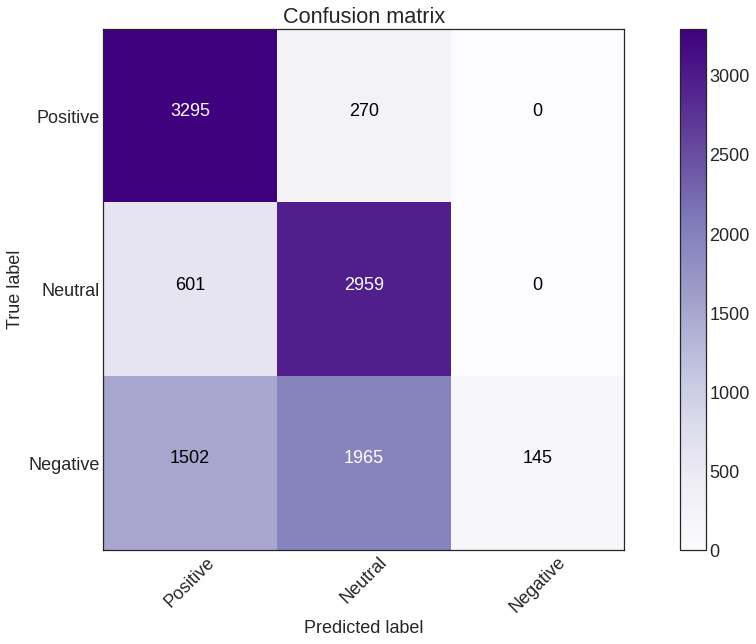

In [ ]:
cm = metrics.confusion_matrix(y1_test, y1_pred)
plot_confusion_matrix(cm, classes = ['Positive','Neutral','Negative'])

In [ ]:
print("Classification Report:\n",classification_report(y1_test, y1_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.92      0.74      3565
           1       0.57      0.83      0.68      3560
           2       1.00      0.04      0.08      3612

    accuracy                           0.60     10737
   macro avg       0.73      0.60      0.50     10737
weighted avg       0.73      0.60      0.49     10737



In [ ]:
#cross-validation
cv1 = cross_val_score(classifier, X1, y1, cv=10, scoring='accuracy', n_jobs=-10)*100
print(cv1)
print("Cross Validation:", round(cv1.mean(), 2))

[86.9140625  87.15820312 86.81640625 85.93063019 87.00537372 86.51685393
 86.8099658  86.90766976 86.41914998 86.17489008]
Cross Validation: 86.67


In [ ]:
classifier = LogisticRegression(C = 16.768)
ovr = OneVsRestClassifier(classifier)
ovr.fit(X1_train, y1_train)
y1_pred = ovr.predict(X1_test)

In [ ]:
#performance metrices
accuracy1 = metrics.accuracy_score(y1_test,y1_pred)*100
print("Accuracy: ", round(accuracy1, 2))

precision1 = metrics.precision_score(y1_test,y1_pred, average='weighted')*100
print("Precision: ", round(precision1, 2))

recall1 = metrics.recall_score(y1_test,y1_pred, average='macro')*100
print("Recall: ", round(recall1, 2))

f1_score1 = metrics.f1_score(y1_test,y1_pred, average='weighted')*100
print("F1 Score:", round(f1_score1, 2))

Accuracy:  82.29
Precision:  82.78
Recall:  82.25
F1 Score: 82.27


Confusion matrix, without normalization


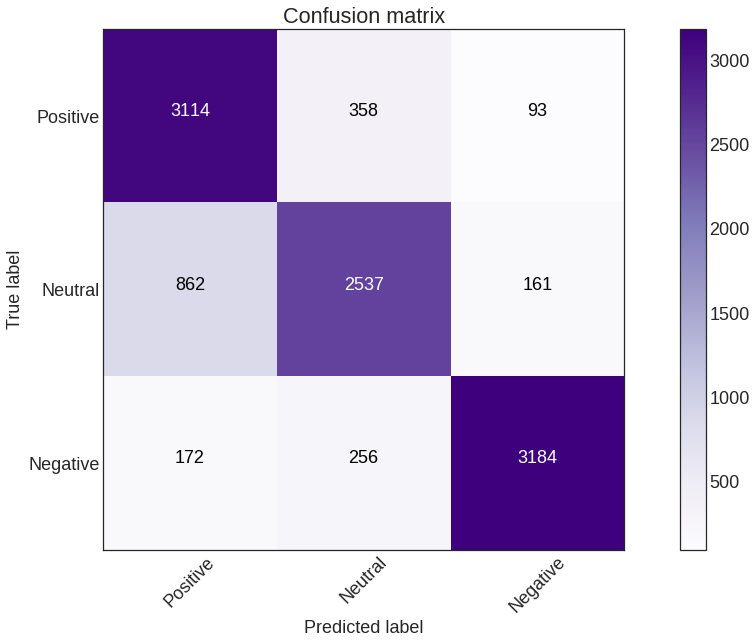

In [ ]:
cm = metrics.confusion_matrix(y1_test, y1_pred)
plot_confusion_matrix(cm, classes = ['Positive','Neutral','Negative'])

In [ ]:
print("Classification Report:\n",classification_report(y1_test, y1_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.87      0.81      3565
           1       0.81      0.71      0.76      3560
           2       0.93      0.88      0.90      3612

    accuracy                           0.82     10737
   macro avg       0.83      0.82      0.82     10737
weighted avg       0.83      0.82      0.82     10737



In [ ]:
#cross-validation
cv1 = cross_val_score(classifier, X1, y1, cv=10, scoring='accuracy', n_jobs=-10)*100
print(cv1)
print("Cross Validation:", round(cv1.mean(), 2))

[86.08398438 87.59765625 86.57226562 86.27259404 87.20078163 85.88177821
 84.75818271 85.29555447 85.44211041 84.75818271]
Cross Validation: 85.99


In [ ]:
# @title Random Forest
rf = RandomForestClassifier(n_estimators=10,criterion = 'gini', random_state=0)
ovr = OneVsRestClassifier(rf)
ovr.fit(X1_train, y1_train)
y1_pred = ovr.predict(X1_test)


In [ ]:
#performance metrices
accuracy1 = metrics.accuracy_score(y1_test,y1_pred)*100
print("Accuracy: ", round(accuracy1, 2))

precision1 = metrics.precision_score(y1_test,y1_pred, average='weighted')*100
print("Precision: ", round(precision1, 2))

recall1 = metrics.recall_score(y1_test,y1_pred, average='macro')*100
print("Recall: ", round(recall1, 2))

f1_score1 = metrics.f1_score(y1_test,y1_pred, average='weighted')*100
print("F1 Score:", round(f1_score1, 2))

Accuracy:  87.71
Precision:  87.95
Recall:  87.68
F1 Score: 87.6


Confusion matrix, without normalization


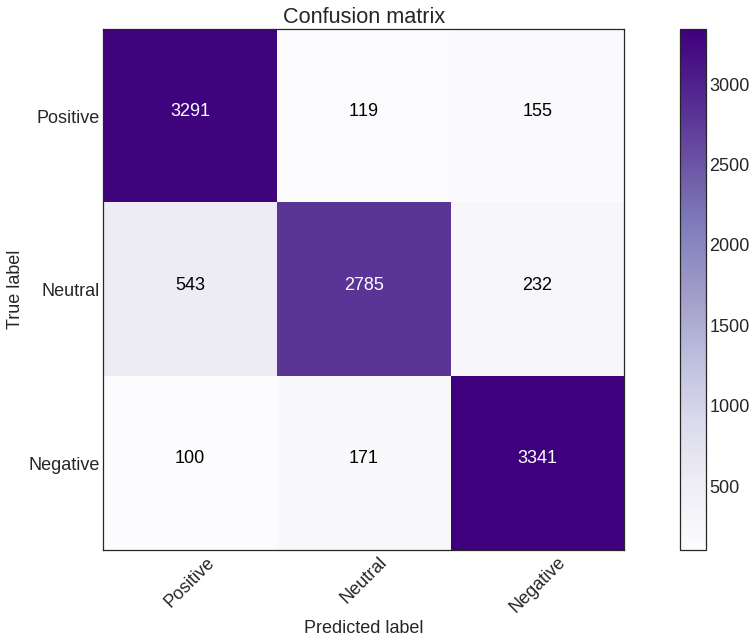

In [ ]:
cm = metrics.confusion_matrix(y1_test, y1_pred)
plot_confusion_matrix(cm, classes = ['Positive','Neutral','Negative'])

In [ ]:
print("Classification Report:\n",classification_report(y1_test, y1_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      3565
           1       0.91      0.78      0.84      3560
           2       0.90      0.92      0.91      3612

    accuracy                           0.88     10737
   macro avg       0.88      0.88      0.88     10737
weighted avg       0.88      0.88      0.88     10737



In [ ]:
#cross-validation
cv1 = cross_val_score(rf, X1, y1, cv=10, scoring='accuracy', n_jobs=-10)*100
print(cv1)
print("Cross Validation:", round(cv1.mean(), 2))

[87.5        87.64648438 87.45117188 87.59159746 87.7381534  87.44504152
 87.4938935  87.20078163 87.29848559 86.90766976]
Cross Validation: 87.43


In [ ]:
#creating the objects
logreg = LogisticRegression()
knn = KNeighborsClassifier()
svc = LinearSVC()
nb = MultinomialNB()
rf = RandomForestClassifier()
cv_dict = {0: 'Logistic Regression', 1:'KNN', 2:'SVC', 3:'Naive Bayes', 4: 'Random Forest'}
cv_models = [logreg, knn, svc, nb, rf]

for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X1, y1, cv = 10, scoring = 'accuracy').mean()))

Logistic Regression Test Accuracy: 0.8692899002351002
KNN Test Accuracy: 0.8630386598528335
SVC Test Accuracy: 0.8582025048088665
Naive Bayes Test Accuracy: 0.8711960338299951
Random Forest Test Accuracy: 0.874761942018808
